In [201]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [202]:
# importing data
data=pd.read_csv('train.csv')

In [203]:
data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [204]:
# displaying common data metrics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [205]:
#### Check for duplicates
idsUnique = len(set(data.Id))
idsTotal = data.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

#### Drop Id column
data.drop("Id", axis = 1, inplace = True)

There are 0 duplicate IDs for 1460 total entries


In [206]:
cols=data.columns

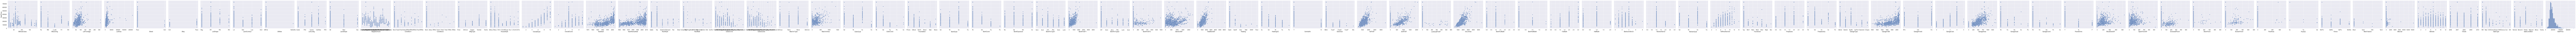

In [207]:
sns.pairplot(data,x_vars=cols,y_vars='SalePrice',height=5)

####  The author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset.
Reference : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

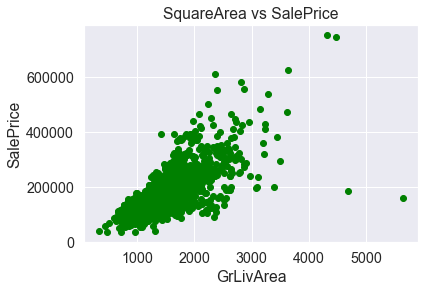

In [208]:
# GrLivArea: Above grade (ground) living area square feet
# plotting scatter plot
plt.scatter(data.GrLivArea, data.SalePrice, c = "green", marker = "o")
plt.title("SquareArea vs SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()



In [209]:
# removing all the rows with area>4000
data=data[data.GrLivArea<4000]

In [210]:
data.shape  # checking data size

(1456, 80)

Text(0.5, 1.0, 'SalePrice distribution')

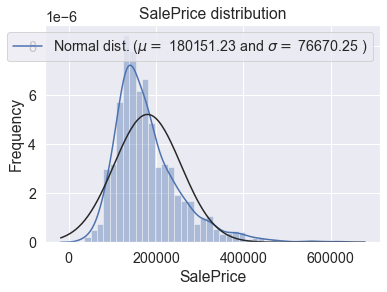

In [211]:
# we will now check SalePrice for its closeness to the normal distribution. 
sns.distplot(data['SalePrice'],fit=norm);
(mu, sigma)=norm.fit(data['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [212]:
# We need to transform the target variable as linear models favor normlised data

Text(0.5, 1.0, 'SalePrice distribution')

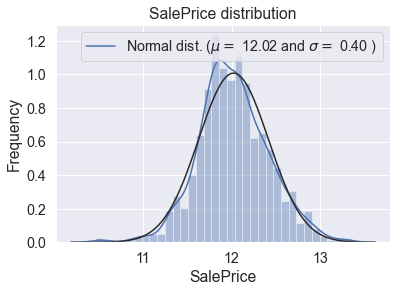

In [213]:
# transforming Sales Price by log (1+x) transformation. This caters for 0 values in the columns
data['SalePrice']=np.log1p(data['SalePrice'])
# we check the distribution again after the transformation
sns.distplot(data['SalePrice'],fit=norm);
(mu, sigma)=norm.fit(data['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#### Our target variable is normally distributed

In [214]:
# we will see each column for the type of data present
for i in data.columns:
    print("the category is {} and number of features are {}".format(i,data[i].nunique()))

the category is MSSubClass and number of features are 15
the category is MSZoning and number of features are 5
the category is LotFrontage and number of features are 109
the category is LotArea and number of features are 1069
the category is Street and number of features are 2
the category is Alley and number of features are 2
the category is LotShape and number of features are 4
the category is LandContour and number of features are 4
the category is Utilities and number of features are 2
the category is LotConfig and number of features are 5
the category is LandSlope and number of features are 3
the category is Neighborhood and number of features are 25
the category is Condition1 and number of features are 9
the category is Condition2 and number of features are 8
the category is BldgType and number of features are 5
the category is HouseStyle and number of features are 8
the category is OverallQual and number of features are 10
the category is OverallCond and number of features are 9

In [215]:
categorical=[feat for feat in data.columns if data[feat].nunique()<30]

In [216]:
for i in categorical:
    print("the category is {} and number of features are {}".format(i,data[i].unique()))

the category is MSSubClass and number of features are [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
the category is MSZoning and number of features are ['RL' 'RM' 'C (all)' 'FV' 'RH']
the category is Street and number of features are ['Pave' 'Grvl']
the category is Alley and number of features are [nan 'Grvl' 'Pave']
the category is LotShape and number of features are ['Reg' 'IR1' 'IR2' 'IR3']
the category is LandContour and number of features are ['Lvl' 'Bnk' 'Low' 'HLS']
the category is Utilities and number of features are ['AllPub' 'NoSeWa']
the category is LotConfig and number of features are ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
the category is LandSlope and number of features are ['Gtl' 'Mod' 'Sev']
the category is Neighborhood and number of features are ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 '

#### Checking for missing values

In [217]:
data_na=(data.isna().sum()/len(data))*100 # creating a series that has total percentage of missing values

In [218]:
data_na=data_na.drop(data_na[data_na==0].index).sort_values(ascending=False) # filtering the series and sorting

In [219]:
data_na=pd.DataFrame({'Missing':data_na}) # creating dataframe and storing
data_na.head(30)

Missing
PoolQC        99.656593
MiscFeature   96.291209
Alley         93.750000
Fence         80.769231
FireplaceQu   47.390110
LotFrontage   17.788462
GarageType     5.563187
GarageYrBlt    5.563187
GarageFinish   5.563187
GarageQual     5.563187
GarageCond     5.563187
BsmtExposure   2.609890
BsmtFinType2   2.609890
BsmtFinType1   2.541209
BsmtCond       2.541209
BsmtQual       2.541209
MasVnrArea     0.549451
MasVnrType     0.549451
Electrical     0.068681

### Handling missing values

#### PoolQC:  categorical ordinal

In [220]:
#PoolQC : data description says NA means "No Pool".Majority of houses have no Pool at all in general. 

In [221]:
data['PoolQC']=data['PoolQC'].fillna('None')

#### miscellaneous: categorical nominal

In [222]:
# miscellaneous features: Na means None
data["MiscFeature"] = data["MiscFeature"].fillna("None")


#### alley: categorical nominal

In [223]:
#Alley :NA means "no alley access"
data["Alley"] = data["Alley"].fillna("None")

#### fence: categorical nominal

In [224]:
#NA means "no fence"
data["Fence"] = data["Fence"].fillna("None")

#### FireplaceQu: categorical ordinal

In [225]:
#FireplaceQu :NA means "no fireplace"
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")


#### LotFrontage: numerical continuous

In [226]:
#fill in missing values by the median LotFrontage (the street area) of the neighborhood.
data['LotFrontage']=data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#### GarageFinish, GarageQual and GarageCond: categorical ordinal    GarageType: categorical nominal

In [227]:
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

#### GarageYrBlt, GarageArea and GarageCars are all numerical

In [228]:
#GarageYrBlt, GarageArea and GarageCars : Replacing Nan with 0 No garage = no cars in such garage
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

#### basement areas: numerical continuous  , fullbath, half bath: numerical discrete

In [229]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

#### these are all categorical ordinal

In [230]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 :NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('No')

#### masonry area is numeric continuous, type is categorical nominal

In [231]:
#MasVnrArea and MasVnrType : We can fill 0 for the area and None for the type.
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

#### mszoning is categorical nominal 

In [232]:
#MSZoning (The general zoning classification) : 'RL' is the mode. So we can fill in missing values with 'RL'
data['MSZoning'].mode()[0]

'RL'

In [233]:
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

In [234]:
# checking utilities
data.groupby('Utilities')['SalePrice'].count()  # we can drop this column as there is little information

Utilities
AllPub    1455
NoSeWa       1
Name: SalePrice, dtype: int64

In [235]:
data = data.drop(['Utilities'], axis=1)

#### Functional: categorical nominal


In [236]:
#Functional : data description says NA means typical
data["Functional"] = data["Functional"].fillna("Typ")

#### Electrcal:categorical nominal

In [237]:
# Electrical : Since this feature has mostly 'SBrkr', we can set that for the missing value.

data.groupby('Electrical')['SalePrice'].count()

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1330
Name: SalePrice, dtype: int64

In [238]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [239]:
pd.set_option('display.max_rows',None)   # we can see there are 0 missing values
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [240]:
# checking the type of data again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1456 non-null   int64  
 1   MSZoning       1456 non-null   object 
 2   LotFrontage    1456 non-null   float64
 3   LotArea        1456 non-null   int64  
 4   Street         1456 non-null   object 
 5   Alley          1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   LotConfig      1456 non-null   object 
 9   LandSlope      1456 non-null   object 
 10  Neighborhood   1456 non-null   object 
 11  Condition1     1456 non-null   object 
 12  Condition2     1456 non-null   object 
 13  BldgType       1456 non-null   object 
 14  HouseStyle     1456 non-null   object 
 15  OverallQual    1456 non-null   int64  
 16  OverallCond    1456 non-null   int64  
 17  YearBuilt      1456 non-null   int64  
 18  YearRemo

#### there are few columns that are encoded as numerical but can be represented as categorical data

In [241]:
# 'MSSubClass', 'OverallCond', 'OverallQual', 'MoSold':  Converting them into categorical ordinal data
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)
data['OverallQual'] = data['OverallQual'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)


In [242]:
data[['MSSubClass', 'OverallCond', 'OverallQual','MoSold']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MSSubClass   1456 non-null   object
 1   OverallCond  1456 non-null   object
 2   OverallQual  1456 non-null   object
 3   MoSold       1456 non-null   object
dtypes: object(4)
memory usage: 56.9+ KB


In [243]:
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley','MSSubClass', 'OverallCond','OverallQual', 
        'MoSold']
for i in cols:
    print(i, data[i].unique())

FireplaceQu ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
BsmtQual ['Gd' 'TA' 'Ex' 'No' 'Fa']
BsmtCond ['TA' 'Gd' 'No' 'Fa' 'Po']
GarageQual ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
GarageCond ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
ExterQual ['Gd' 'TA' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa' 'Po']
PoolQC ['None' 'Ex' 'Fa' 'Gd']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No' 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' 'No' 'ALQ' 'Rec' 'LwQ' 'GLQ']
Functional ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
Fence ['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
BsmtExposure ['No' 'Gd' 'Mn' 'Av']
GarageFinish ['RFn' 'Unf' 'Fin' 'None']
LandSlope ['Gtl' 'Mod' 'Sev']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
PavedDrive ['Y' 'N' 'P']
Street ['Pave' 'Grvl']
Alley ['None' 'Grvl' 'Pave']
MSSubClass ['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40']
OverallCond ['5' '8' '6' '7' '4' '2' '3' '9' '1']
OverallQual ['7' '6' '8' '5' '9' '4' '10' '3'

In [244]:
x=[i for i in data.columns if i not in cols]

In [245]:
for i in x:
    print(i, data[i].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage [ 65.   80.   68.   60.   84.   85.   75.   51.   50.   70.   71.   91.
  73.   72.   66.  101.   57.   44.  110.   98.   47.  108.  112.   74.
 115.   66.5  61.   48.   33.   52.  100.   24.   89.   63.   76.   81.
  95.   69.   21.   32.   78.  121.  122.   40.  105.   77.   64.   94.
  34.   90.   55.   88.   82.  120.  107.   92.  134.   62.   86.  141.
  97.   73.5  54.   41.   79.  174.   99.   67.   83.   43.  103.   93.
  30.   64.5 129.  140.   35.   37.  118.   87.  116.  150.  111.   49.
  96.   59.   36.   56.  102.   58.   38.  109.  130.   53.  137.   61.5
  45.  106.   42.   39.  104.  144.  114.  128.  149.  313.  168.  182.
 138.  152.   88.5 124.  153.   46. ]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgH

In [246]:
# creating useful time features
data['YearsSinceRemodel'] = data['YrSold'] - data['YearRemodAdd']
data['YrBltAndRemod'] = data['YearRemodAdd']-data['YearBuilt']


In [247]:
data[['YearsSinceRemodel','YrBltAndRemod']].head(10) # displaying few samples

YearsSinceRemodel  YrBltAndRemod
0                  5              0
1                 31              0
2                  6              1
3                 36             55
4                  8              0
5                 14              2
6                  2              1
7                 36              0
8                 58             19
9                 58             11

#### We will do label encoding for ordinal categorical variables


In [248]:
# the ordinal variables are:
cols

['FireplaceQu',
 'BsmtQual',
 'BsmtCond',
 'GarageQual',
 'GarageCond',
 'ExterQual',
 'ExterCond',
 'HeatingQC',
 'PoolQC',
 'KitchenQual',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'Fence',
 'BsmtExposure',
 'GarageFinish',
 'LandSlope',
 'LotShape',
 'PavedDrive',
 'Street',
 'Alley',
 'MSSubClass',
 'OverallCond',
 'OverallQual',
 'MoSold']

In [249]:
# Encode some categorical features as ordered numbers when there is information in the order
data = data.replace({"Alley" : {"None":0,"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "Fence" : {'None':0 ,'MnWw':1,'GdWo':2,'MnPrv': 3, 'GdPrv':4 },
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"None": 0, "Unf":1, "RFn" :2, "Fin": 3},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                       "MSSubClass" :{'60':6, '20':1,'70':7, '50':5, '190':15, '45':4, '90':11, '120':12, '30':2, '85':10, '80':9, '160':13, '75':8, '180':14, '40':3},
                       'OverallCond' :{'5':5 ,'8':8,'6':6,'7':7 ,'4':4 ,'2':2 ,'3':3 ,'9':9, '1':1},
                       'OverallQual' :{'7':7, '6':6, '8':8, '5':5, '9':9,'4':4,'10':10, '3':3, '1':1, '2':2},
                       'MoSold' : {'2':2, '5':5,'9':9, '12':12, '10':10, '8':8, '11':11, '4':4, '1':1,'7':7,'3':3,'6':6}

                      }
                     )

In [250]:
data[cols].head(10)

FireplaceQu  BsmtQual  BsmtCond  GarageQual  GarageCond  ExterQual  \
0            0         4         3           3           3          4   
1            3         4         3           3           3          3   
2            3         4         3           3           3          4   
3            4         3         4           3           3          3   
4            3         4         3           3           3          4   
5            0         4         3           3           3          3   
6            4         5         3           3           3          4   
7            3         4         3           3           3          3   
8            3         3         3           2           3          3   
9            3         3         3           4           3          3   

   ExterCond  HeatingQC  PoolQC  KitchenQual  BsmtFinType1  BsmtFinType2  \
0          3          5       0            4             6             1   
1          3          5       0            3             5             1   
2          3          5       0            4             6             1   
3          3          4       0            4             5             1   
4          3          5       0            4             6             1   
5          3          5       0            3             6             1   
6          3          5       0            4             6             1   
7          3          5       0            3             5             4   
8          3          4       0            3             1             1   
9          3          5       0            3             6             1   

   Functional  Fence  BsmtExposure  GarageFinish  LandSlope  LotShape  \
0           8      0             0             2          3         4   
1           8      0             3             2          3         4   
2           8      0             1             2          3         3   
3           8      0             0             1          3         3   
4           8      0             2             2          3         3   
5           8      3             0             1          3         3   
6           8      0             2             2          3         4   
7           8      0             1             2          3         3   
8           7      0             0             1          3         4   
9           8      0             0             2          3         4   

   PavedDrive  Street  Alley  MSSubClass  OverallCond  OverallQual  MoSold  
0           2       2      0           6            5            7       2  
1           2       2      0           1            8            6       5  
2           2       2      0           6            5            7       9  
3           2       2      0           7            5            7       2  
4           2       2      0           6            5            8      12  
5           2       2      0           5            5            5      10  
6           2       2      0           1            5            8       8  
7           2       2      0           6            6            7      11  
8           2       2      0           5            5            7       4  
9           2       2      0          15            6            5       1

#### we will simplify the label encoded features into simpler classes

In [251]:
# Create new features
# 1* Simplifications of existing features
data["SimplOverallQual"] = data.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data["SimplOverallCond"] = data.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data["SimplPoolQC"] = data.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
data["SimplGarageCond"] = data.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data["SimplGarageQual"] = data.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data["SimplFireplaceQu"] = data.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplFireplaceQu"] = data.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplFunctional"] = data.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
data["SimplKitchenQual"] = data.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplHeatingQC"] = data.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data["SimplBsmtFinType1"] = data.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data["SimplBsmtFinType2"] = data.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data["SimplBsmtCond"] = data.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data["SimplBsmtQual"] = data.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data["SimplExterCond"] = data.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data["SimplExterQual"] = data.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


In [252]:
# checking the data
data.head()

MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0           6       RL         65.0     8450       2      0         4   
1           1       RL         80.0     9600       2      0         4   
2           6       RL         68.0    11250       2      0         3   
3           7       RL         60.0     9550       2      0         3   
4           6       RL         84.0    14260       2      0         3   

  LandContour LotConfig  LandSlope Neighborhood Condition1 Condition2  \
0         Lvl    Inside          3      CollgCr       Norm       Norm   
1         Lvl       FR2          3      Veenker      Feedr       Norm   
2         Lvl    Inside          3      CollgCr       Norm       Norm   
3         Lvl    Corner          3      Crawfor       Norm       Norm   
4         Lvl       FR2          3      NoRidge       Norm       Norm   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story            7            5       2003          2003   
1     1Fam     1Story            6            8       1976          1976   
2     1Fam     2Story            7            5       2001          2002   
3     1Fam     2Story            7            5       1915          1970   
4     1Fam     2Story            8            5       2000          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   

   ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          4          3      PConc         4         3             0   
1          3          3     CBlock         4         3             3   
2          4          3      PConc         4         3             1   
3          3          3     BrkTil         3         4             0   
4          4          3      PConc         4         3             2   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   
3             5         216             1           0        540          756   
4             6         655             1           0        490         1145   

  Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA          5          Y      SBrkr       856       854             0   
1    GasA          5          Y      SBrkr      1262         0             0   
2    GasA          5          Y      SBrkr       920       866             0   
3    GasA          4          Y      SBrkr       961       756             0   
4    GasA          5          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            4             8           8           0   
1             1            3             6           8           1   
2             1            4             6           8           1   
3             1            4             7           8           1   
4             1      

#### during missing value imputations, we assigned 0 to some areas. We will transform this data into new columns to extract information

##### In a nutshell, we define feature engineering as creating new features from your existing ones to improve model performance.

In [253]:
 # converting the entries with/without deck/porch area to 0/1
data['HasWoodDeck'] = (data['WoodDeckSF'] == 0) * 1      
data['HasOpenPorch'] = (data['OpenPorchSF'] == 0) * 1
data['HasEnclosedPorch'] = (data['EnclosedPorch'] == 0) * 1
data['Has3SsnPorch'] = (data['3SsnPorch'] == 0) * 1
data['HasScreenPorch'] = (data['ScreenPorch'] == 0) * 1

# creating simple binary columns that indicate if that feature is present
data['haspool'] = data['PoolArea'].apply(lambda x: 1 if x > 0 else 0) 
data['has2ndfloor'] = data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# 2* Combinations of existing features

# Overall quality of the house
data["TotalHouseGrade"] = data["OverallQual"] * data["OverallCond"]
# Overall quality of the garage
data["GarageGrade"] = data["GarageQual"] * data["GarageCond"]
# Overall quality of the exterior
data["ExteriorGrade"] = data["ExterQual"] * data["ExterCond"]
# Overall kitchen score
data["KitchenScore"] = data["KitchenAbvGr"] * data["KitchenQual"]
# Overall fireplace score
data["FireplaceScore"] = data["Fireplaces"] * data["FireplaceQu"]
# Overall garage score
data["GarageScore"] = data["GarageArea"] * data["GarageQual"]
# Overall pool score
data["PoolScore"] = data["PoolArea"] * data["PoolQC"]
# Simplified overall quality of the house
data["SimplOverallGrade"] = data["SimplOverallQual"] * data["SimplOverallCond"]
# Simplified overall quality of the exterior
data["SimplExterGrade"] = data["SimplExterQual"] * data["SimplExterCond"]
# Simplified overall pool score
data["SimplPoolScore"] = data["PoolArea"] *data["SimplPoolQC"]
# Simplified overall garage score
data["SimplGarageScore"] = data["GarageArea"] * data["SimplGarageQual"]
# Simplified overall fireplace score
data["SimplFireplaceScore"] = data["Fireplaces"] * data["SimplFireplaceQu"]
# Simplified overall kitchen score
data["SimplKitchenScore"] = data["KitchenAbvGr"] * data["SimplKitchenQual"]



# adding up all floor area
data['TotalSF'] = data["GrLivArea"] + data["TotalBsmtSF"]
# Total area for 1st + 2nd floors
data["TotalFlrsSF"] = data["1stFlrSF"] + data["2ndFlrSF"]
# Total area for porch
data["AllPorchSF"] = data["OpenPorchSF"] + data["EnclosedPorch"] + \
data["3SsnPorch"] + data["ScreenPorch"]

# Total number of bathrooms
# total bathrooms with more weightage given to full sized
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) +
                               data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))


# Has masonry veneer or not
data["HasMasVnr"] = data.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
data["BoughtOffPlan"] =data.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})


#### We will check for correlation between the variables and sale price

In [254]:
print("Find most important features relative to target")
corr = data.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice              1.000000
OverallQual            0.819240
TotalSF                0.817272
TotalFlrsSF            0.729421
GrLivArea              0.718844
SimplOverallQual       0.707934
ExterQual              0.680947
GarageCars             0.680408
Total_Bathrooms        0.672929
KitchenQual            0.667174
GarageScore            0.656822
GarageArea             0.655212
TotalBsmtSF            0.641553
SimplExterQual         0.635550
SimplGarageScore       0.630802
BsmtQual               0.615225
1stFlrSF               0.613742
SimplKitchenQual       0.610142
GarageFinish           0.604917
TotalHouseGrade        0.604291
SimplBsmtQual          0.593651
FullBath               0.590919
YearBuilt              0.588977
ExteriorGrade          0.587425
YearRemodAdd           0.568986
FireplaceQu            0.546553
TotRmsAbvGrd           0.533446
SimplOverallGrade      0.526918
SimplKitchenScore      0.523426
FireplaceScore         0

#### We will apply polynomial powers of 2nd,3rd and square root on the top features to help the model learn non linear patterns in data

In [255]:
data["OverallQual-s2"] = data["OverallQual"] ** 2
data["OverallQual-s3"] = data["OverallQual"] ** 3
data["OverallQual-Sq"] = np.sqrt(data["OverallQual"])
data["AllSF-2"] = data["TotalSF"] ** 2
data["AllSF-3"] = data["TotalFlrsSF"] ** 3
data["AllSF-Sq"] = np.sqrt(data["TotalSF"])
data["AllFlrsSF-2"] = data["TotalFlrsSF"] ** 2
data["AllFlrsSF-3"] = data["TotalFlrsSF"] ** 3
data["AllFlrsSF-Sq"] = np.sqrt(data["TotalFlrsSF"])
data["GrLivArea-2"] = data["GrLivArea"] ** 2
data["GrLivArea-3"] = data["GrLivArea"] ** 3
data["GrLivArea-Sq"] = np.sqrt(data["GrLivArea"])
data["SimplOverallQual-s2"] = data["SimplOverallQual"] ** 2
data["SimplOverallQual-s3"] = data["SimplOverallQual"] ** 3
data["SimplOverallQual-Sq"] = np.sqrt(data["SimplOverallQual"])
data["ExterQual-2"] = data["ExterQual"] ** 2
data["ExterQual-3"] = data["ExterQual"] ** 3
data["ExterQual-Sq"] = np.sqrt(data["ExterQual"])
data["GarageCars-2"] = data["GarageCars"] ** 2
data["GarageCars-3"] = data["GarageCars"] ** 3
data["GarageCars-Sq"] = np.sqrt(data["GarageCars"])
data["TotalBath-2"] = data["Total_Bathrooms"] ** 2
data["TotalBath-3"] = data["Total_Bathrooms"] ** 3
data["TotalBath-Sq"] = np.sqrt(data["Total_Bathrooms"])
data["KitchenQual-2"] =data["KitchenQual"] ** 2
data["KitchenQual-3"] = data["KitchenQual"] ** 3
data["KitchenQual-Sq"] = np.sqrt(data["KitchenQual"])
data["GarageScore-2"] = data["GarageScore"] ** 2
data["GarageScore-3"] = data["GarageScore"] ** 3
data["GarageScore-Sq"] = np.sqrt(data["GarageScore"])

In [256]:
# display data
data.head(5)      # all important variables have been raised to polynomial degrees

MSSubClass MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0           6       RL         65.0     8450       2      0         4   
1           1       RL         80.0     9600       2      0         4   
2           6       RL         68.0    11250       2      0         3   
3           7       RL         60.0     9550       2      0         3   
4           6       RL         84.0    14260       2      0         3   

  LandContour LotConfig  LandSlope Neighborhood Condition1 Condition2  \
0         Lvl    Inside          3      CollgCr       Norm       Norm   
1         Lvl       FR2          3      Veenker      Feedr       Norm   
2         Lvl    Inside          3      CollgCr       Norm       Norm   
3         Lvl    Corner          3      Crawfor       Norm       Norm   
4         Lvl       FR2          3      NoRidge       Norm       Norm   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story            7            5       2003          2003   
1     1Fam     1Story            6            8       1976          1976   
2     1Fam     2Story            7            5       2001          2002   
3     1Fam     2Story            7            5       1915          1970   
4     1Fam     2Story            8            5       2000          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   

   ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          4          3      PConc         4         3             0   
1          3          3     CBlock         4         3             3   
2          4          3      PConc         4         3             1   
3          3          3     BrkTil         3         4             0   
4          4          3      PConc         4         3             2   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             6         706             1           0        150          856   
1             5         978             1           0        284         1262   
2             6         486             1           0        434          920   
3             5         216             1           0        540          756   
4             6         655             1           0        490         1145   

  Heating  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA          5          Y      SBrkr       856       854             0   
1    GasA          5          Y      SBrkr      1262         0             0   
2    GasA          5          Y      SBrkr       920       866             0   
3    GasA          4          Y      SBrkr       961       756             0   
4    GasA          5          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            4             8           8           0   
1             1            3             6           8           1   
2             1            4             6           8           1   
3             1            4             7           8           1   
4             1      

##### dividing into numerical and categorical for one hot encoding

In [257]:
categorical_features=data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(exclude = ["object"]).columns
y=data['SalePrice']   # extracting target variable
numerical_features = numerical_features.drop("SalePrice")  # dropping target variable 
# creating two seaprate dataframes
num_df=data[numerical_features]
cat_df=data[categorical_features]

In [258]:
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 133
Categorical features : 21


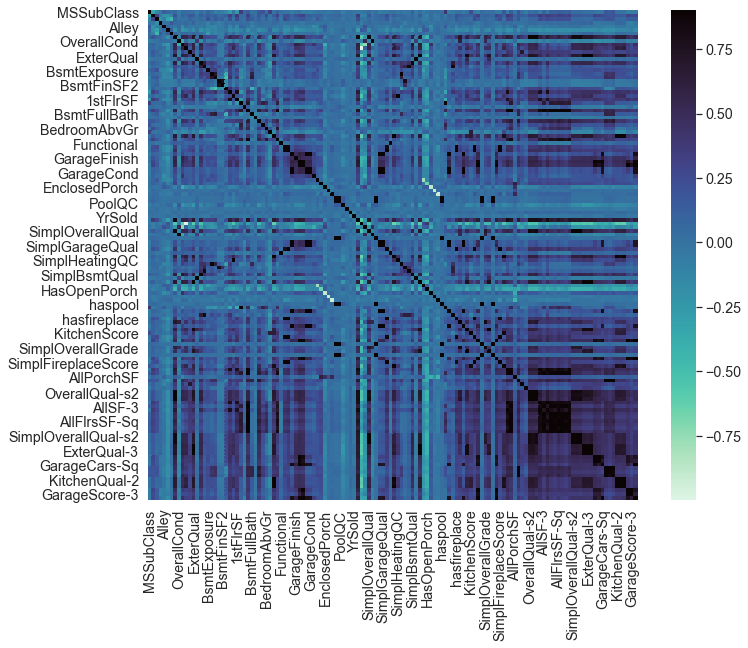

In [259]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
heatm = sns.heatmap(corrmat, vmax=0.9, square=True, cmap = 'mako_r');


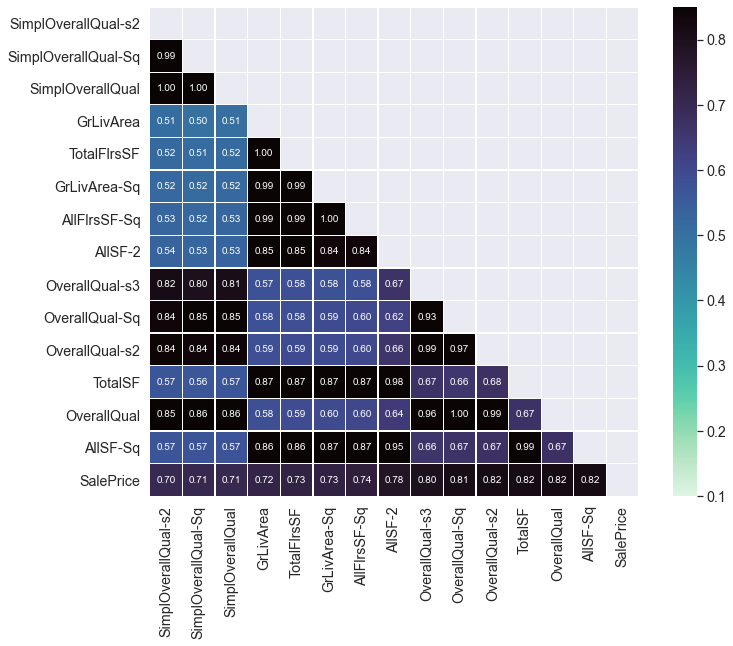

In [260]:
#saleprice correlation matrix
n = 15
#number of parameters for heatmap
cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
cols2 = np.array(list(reversed(cols)))
cm = data[cols2].corr()
# mask to get only the upper triangle of the matrix, as the lower one is just repeated information
mask = np.triu(np.ones_like(cm, dtype=np.bool))
# adjust mask and df

cm2 = cm.iloc[1:,:-1].copy()
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.3)
heatmap = sns.heatmap(cm,mask=mask, cbar=True, annot=True, square=True, cmap = 'mako_r', fmt='.2f', vmin=.1, vmax=.85,linewidth=0.3, annot_kws={'size': 10}, yticklabels=cols2, xticklabels=cols2)


In [261]:
# displaying the two categories
pd.set_option('display.max_columns',None)
num_df.head()

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandSlope  \
0           6         65.0     8450       2      0         4          3   
1           1         80.0     9600       2      0         4          3   
2           6         68.0    11250       2      0         3          3   
3           7         60.0     9550       2      0         3          3   
4           6         84.0    14260       2      0         3          3   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0            7            5       2003          2003       196.0          4   
1            6            8       1976          1976         0.0          3   
2            7            5       2001          2002       162.0          4   
3            7            5       1915          1970         0.0          3   
4            8            5       2000          2000       350.0          4   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0          3         4         3             0             6         706   
1          3         4         3             3             5         978   
2          3         4         3             1             6         486   
3          3         3         4             0             5         216   
4          3         4         3             2             6         655   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  \
0             1           0        150          856          5       856   
1             1           0        284         1262          5      1262   
2             1           0        434          920          5       920   
3             1           0        540          756          4       961   
4             1           0        490         1145          5      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         1             3             1            4             8   
1         0             3             1            3             6   
2         1             3             1            4             6   
3         0             3             1            4             7   
4         1             4             1            4             9   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
0           8           0            0       2003.0             2           2   
1           8           1            3       1976.0             2           2   
2           8           1            3       2001.0             2           2   
3           8           1            4       1998.0             1           3   
4           8           1            3       2000.0             2           3   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548           3           3           2           0           61   
1         460           3           3           2         298            0   
2         608           3           3           2           0           42   
3         642           3           3           2           0           35   
4         836           3           3           2         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  \
0              0          0            0         0       0      0        0   
1              0          0            0         0       0      0        0   
2              0          0            0         0       0      0        0   
3    

In [262]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 133 entries, MSSubClass to GarageScore-Sq
dtypes: float64(16), int32(5), int64(112)
memory usage: 1.5 MB


In [263]:
cat_df.head()

MSZoning LandContour LotConfig Neighborhood Condition1 Condition2 BldgType  \
0       RL         Lvl    Inside      CollgCr       Norm       Norm     1Fam   
1       RL         Lvl       FR2      Veenker      Feedr       Norm     1Fam   
2       RL         Lvl    Inside      CollgCr       Norm       Norm     1Fam   
3       RL         Lvl    Corner      Crawfor       Norm       Norm     1Fam   
4       RL         Lvl       FR2      NoRidge       Norm       Norm     1Fam   

  HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType Foundation  \
0     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace      PConc   
1     1Story     Gable  CompShg     MetalSd     MetalSd       None     CBlock   
2     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace      PConc   
3     2Story     Gable  CompShg     Wd Sdng     Wd Shng       None     BrkTil   
4     2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace      PConc   

  Heating CentralAir Electrical GarageType MiscFeature SaleType SaleCondition  
0    GasA          Y      SBrkr     Attchd        None       WD        Normal  
1    GasA          Y      SBrkr     Attchd        None       WD        Normal  
2    GasA          Y      SBrkr     Attchd        None       WD        Normal  
3    GasA          Y      SBrkr     Detchd        None       WD       Abnorml  
4    GasA          Y      SBrkr     Attchd        None       WD        Normal

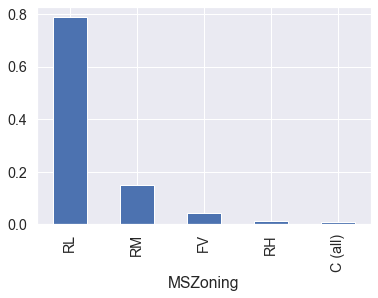

******************


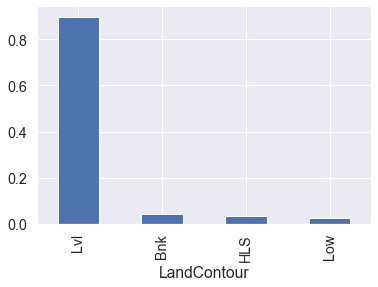

******************


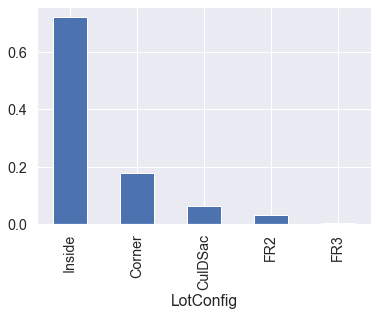

******************


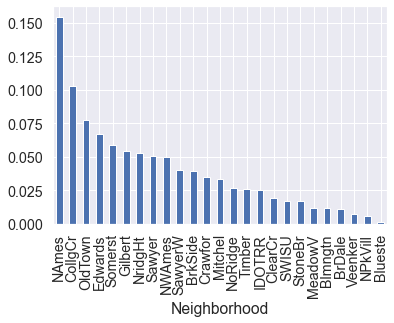

******************


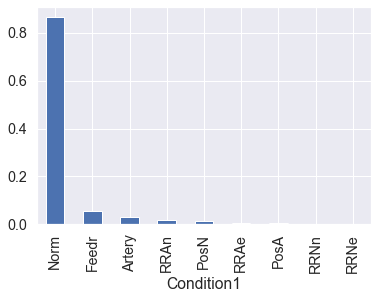

******************


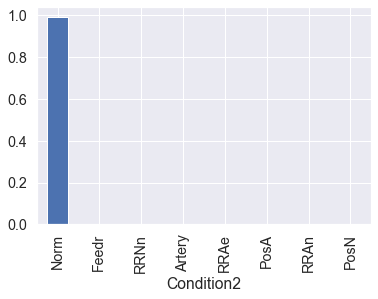

******************


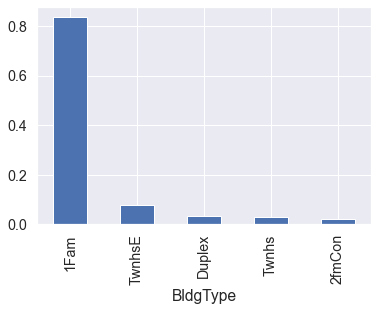

******************


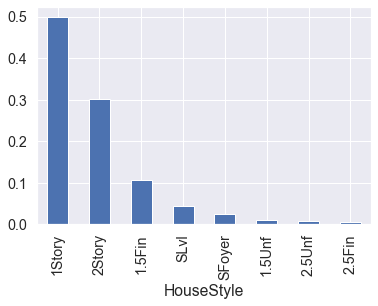

******************


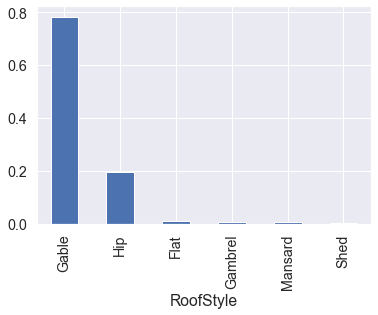

******************


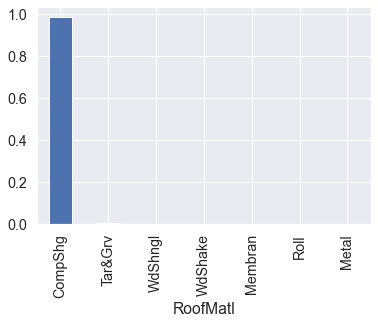

******************


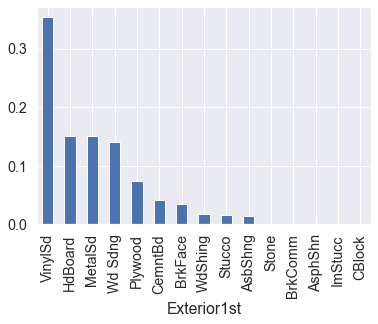

******************


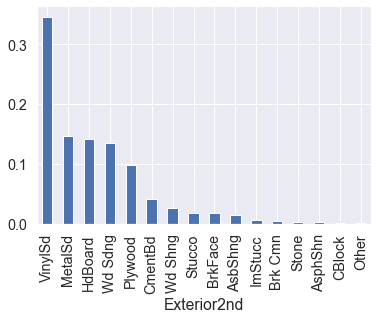

******************


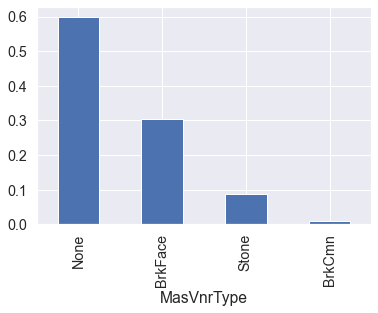

******************


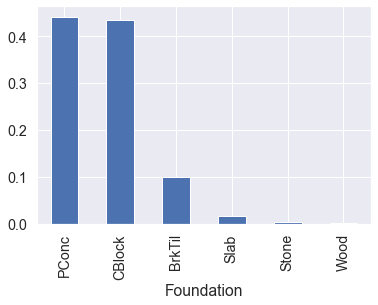

******************


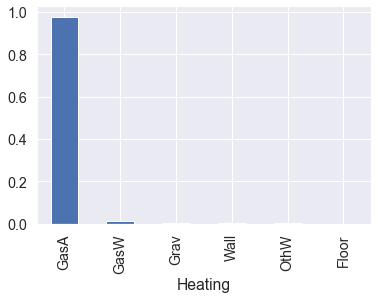

******************


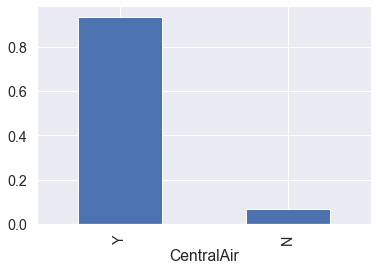

******************


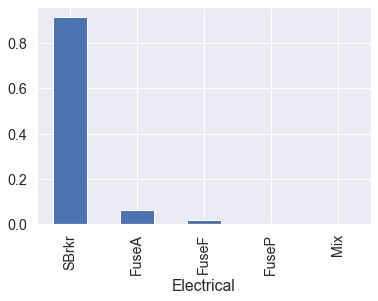

******************


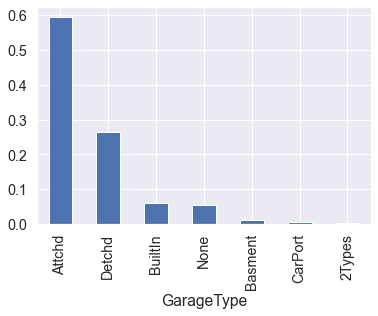

******************


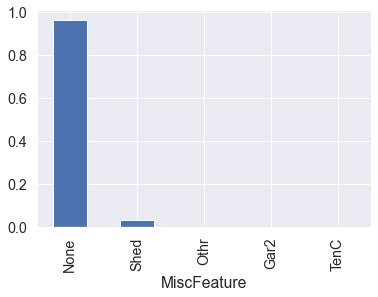

******************


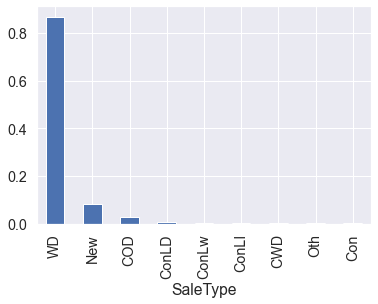

******************


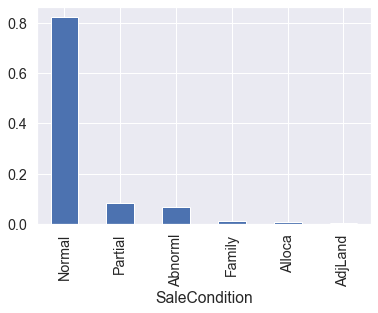

******************


In [264]:
for i in cat_df.columns:
    
    cat_df[i].value_counts(normalize=True).plot.bar()
    plt.xlabel(i)
    plt.show()
    print("******************")

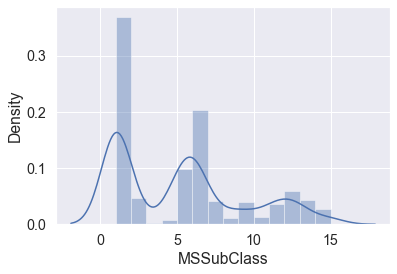

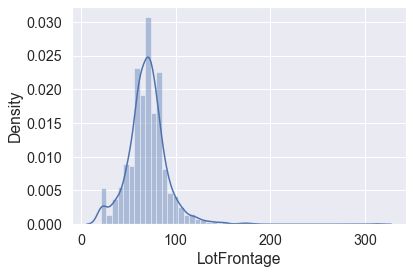

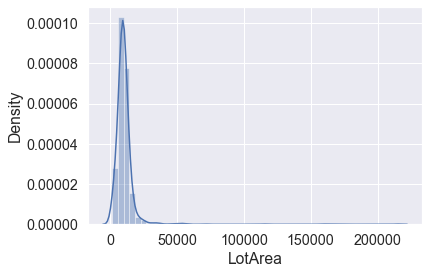

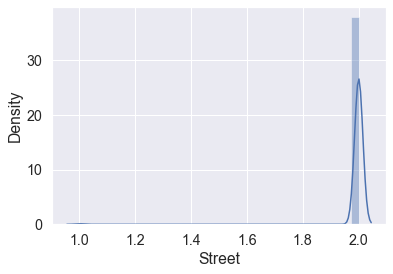

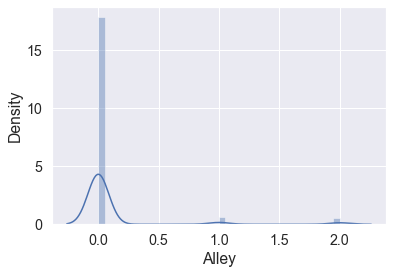

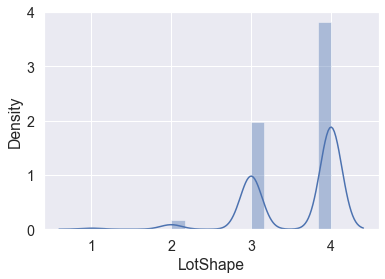

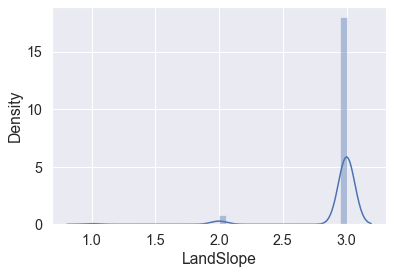

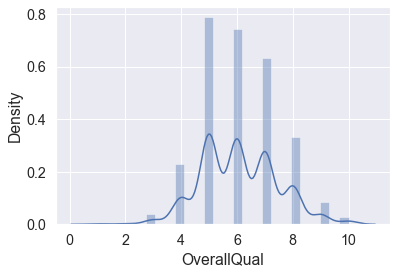

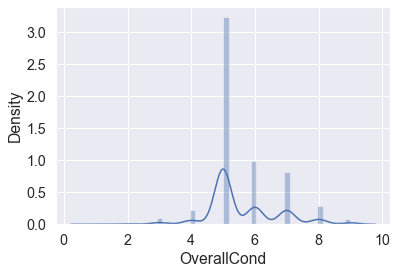

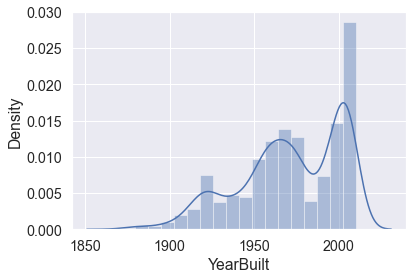

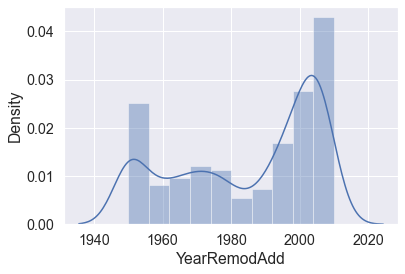

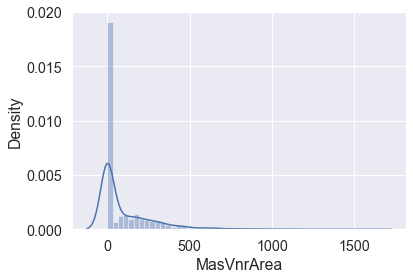

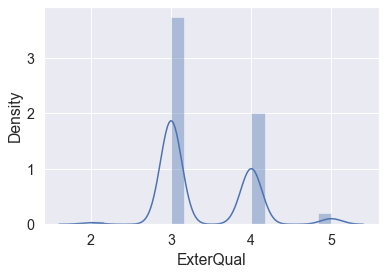

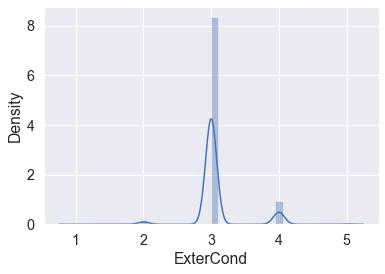

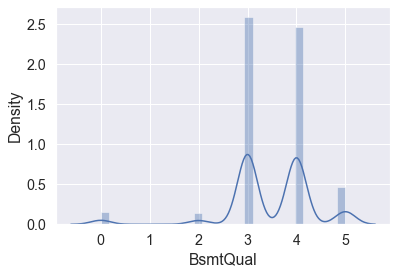

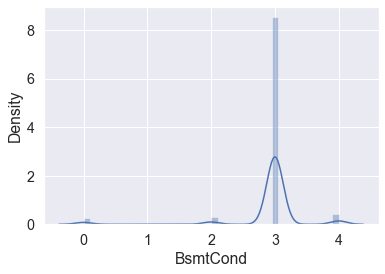

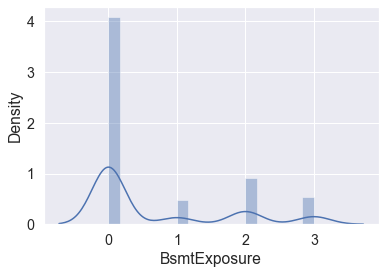

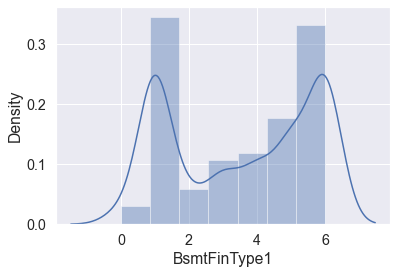

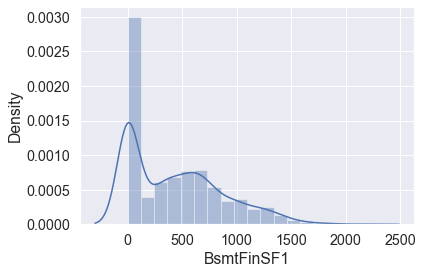

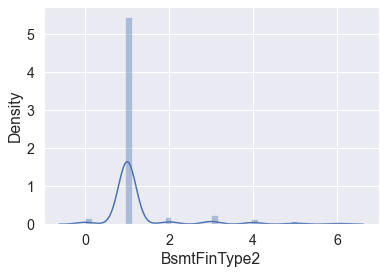

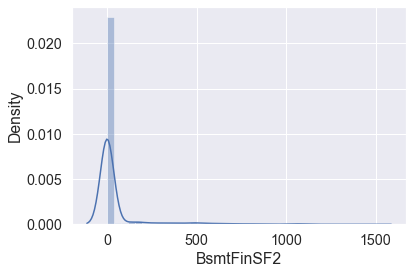

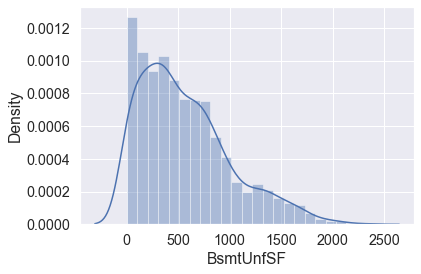

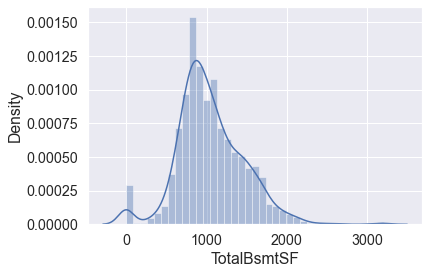

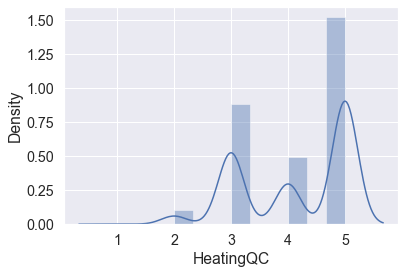

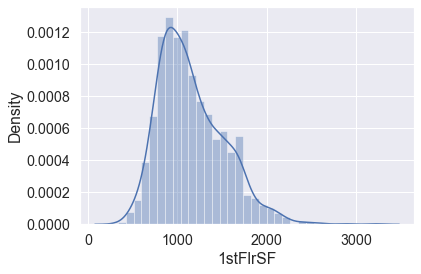

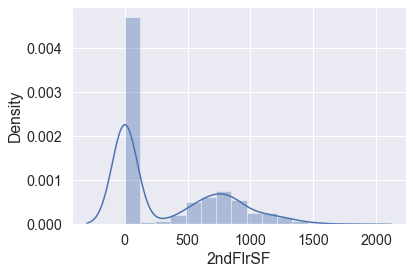

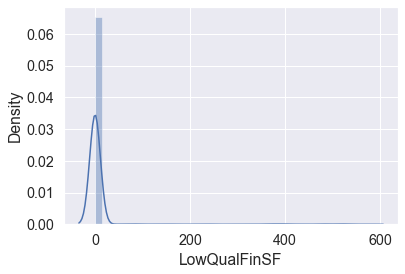

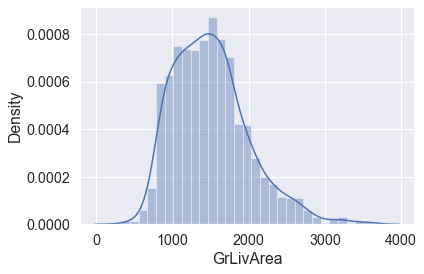

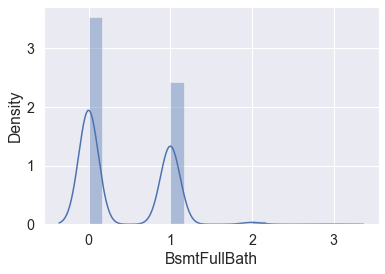

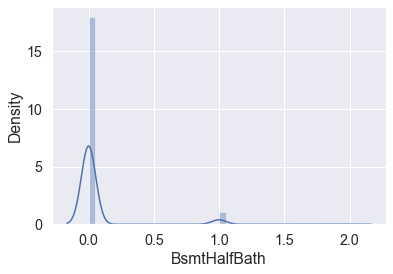

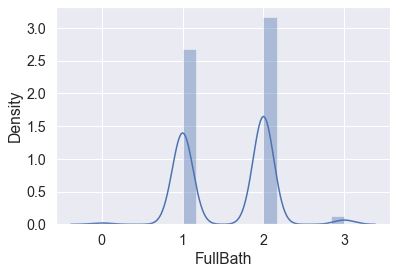

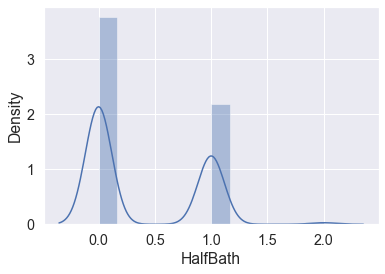

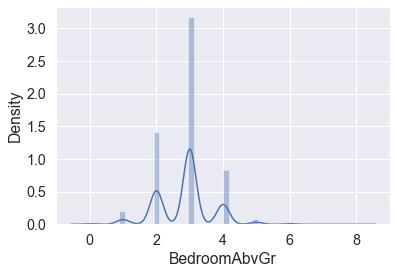

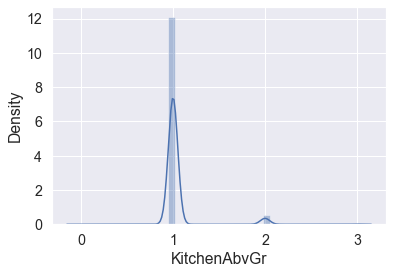

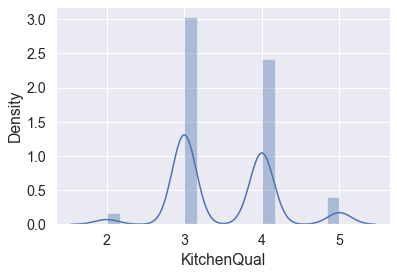

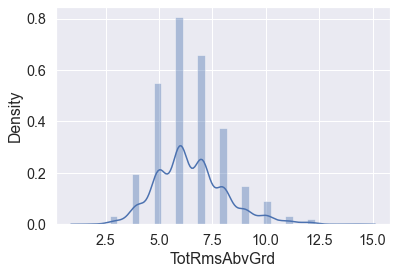

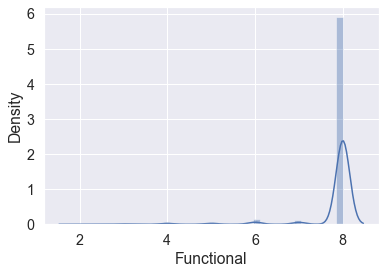

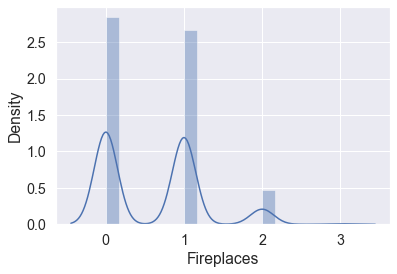

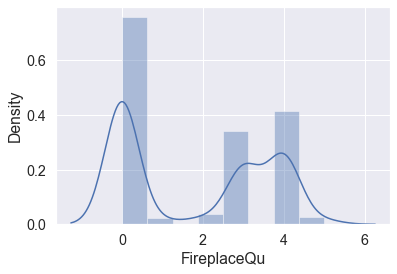

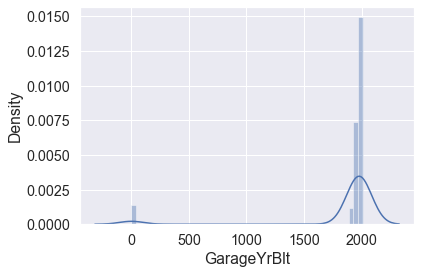

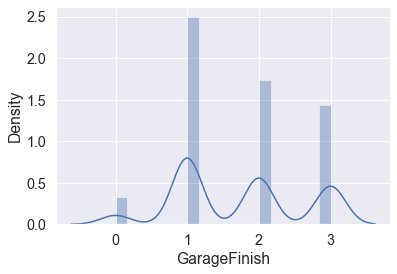

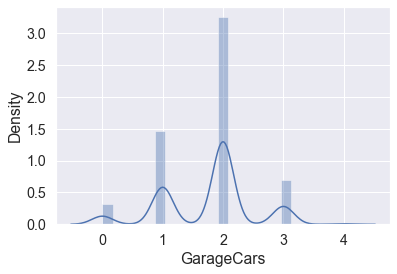

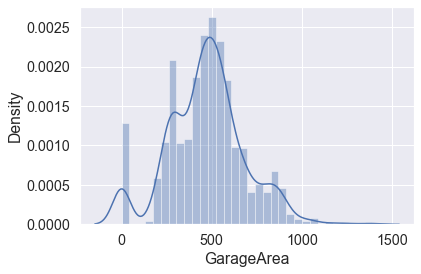

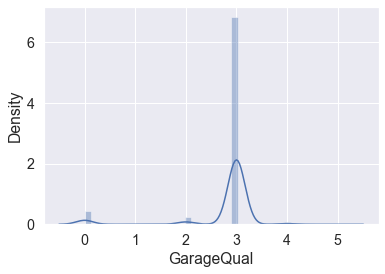

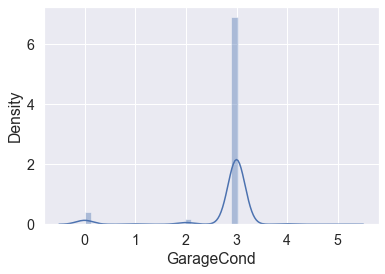

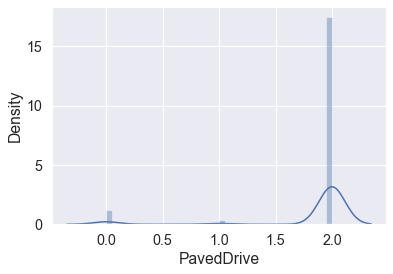

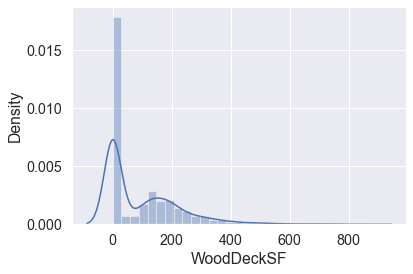

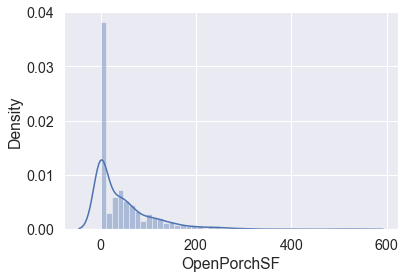

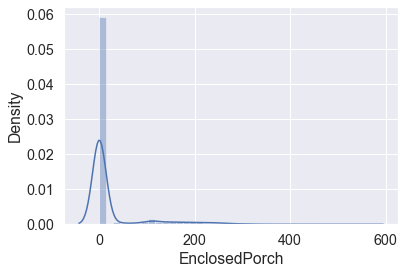

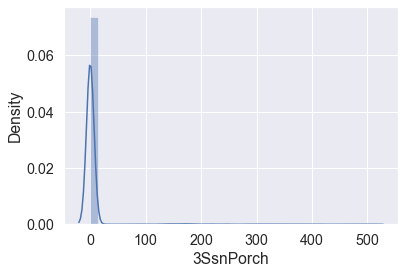

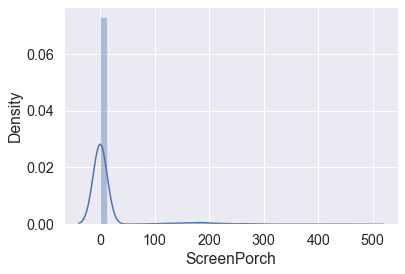

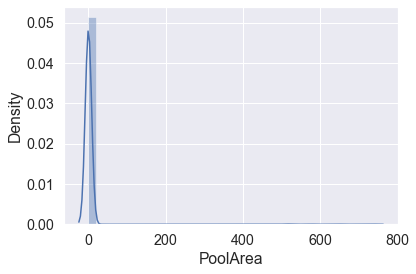

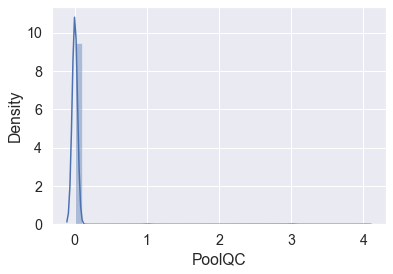

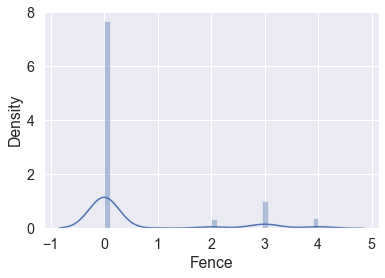

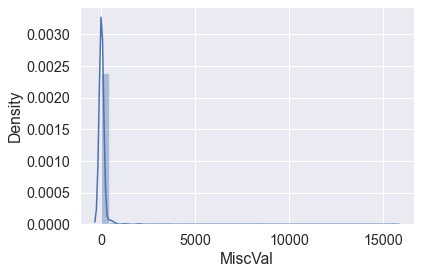

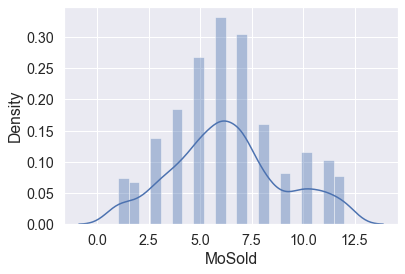

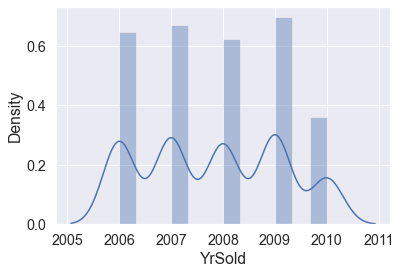

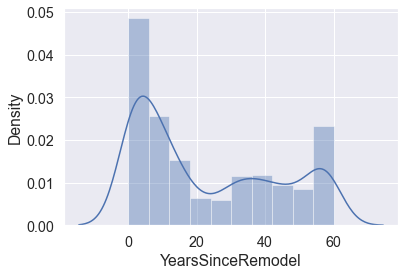

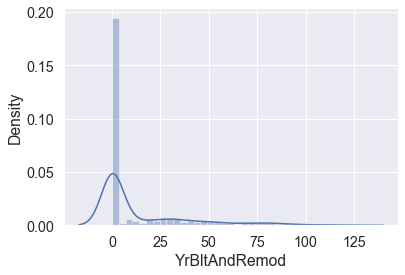

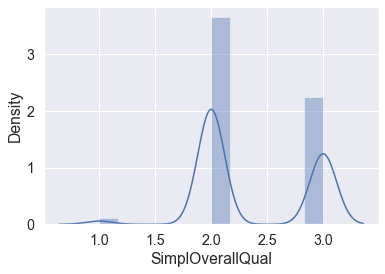

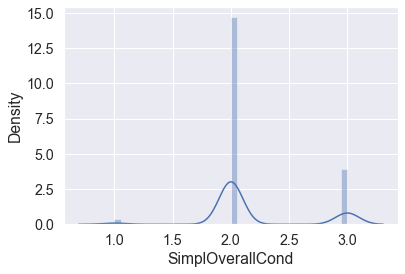

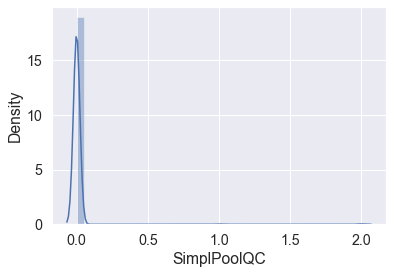

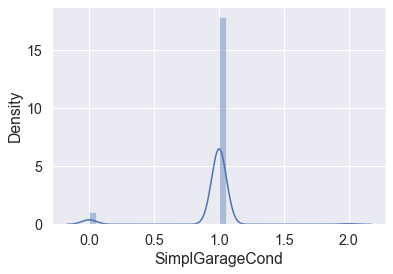

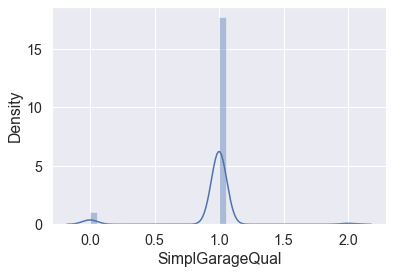

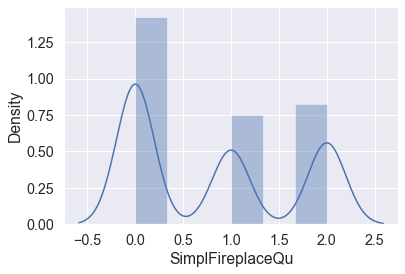

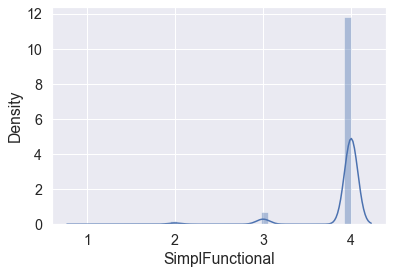

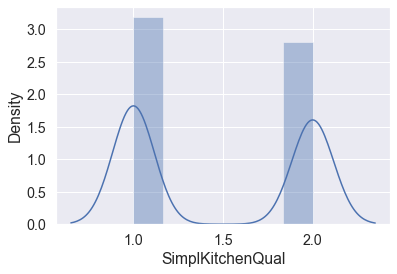

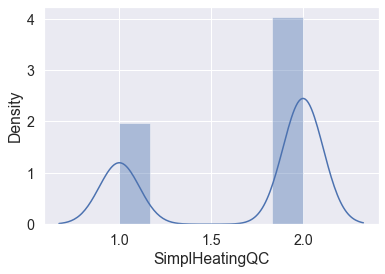

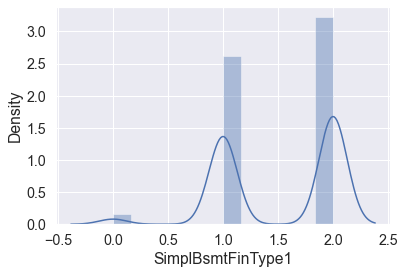

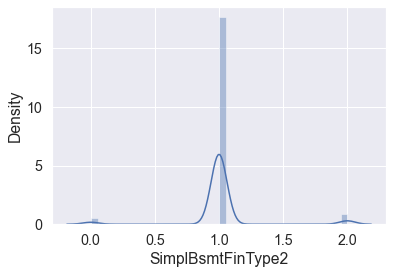

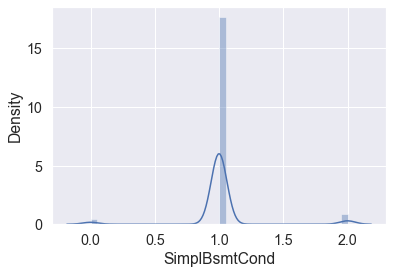

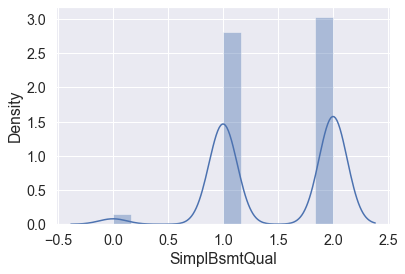

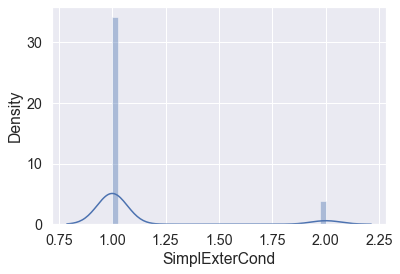

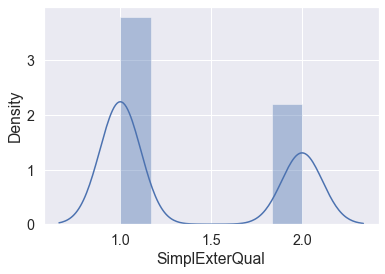

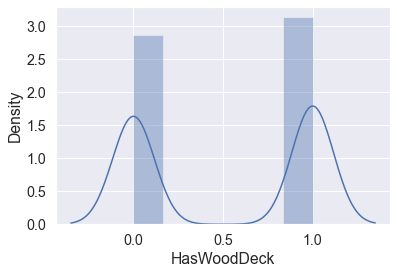

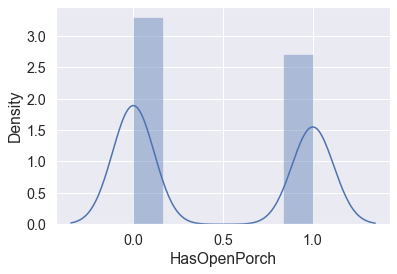

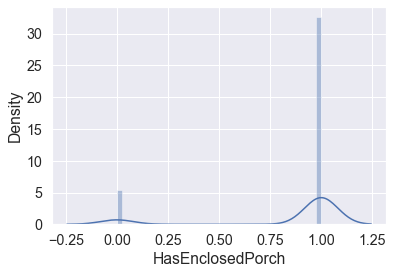

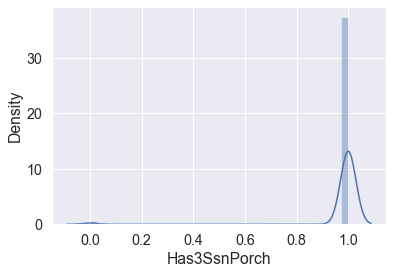

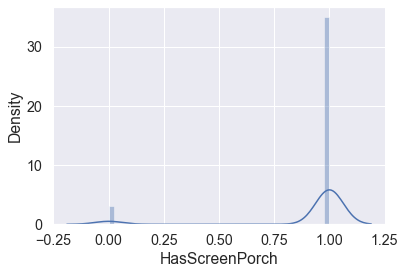

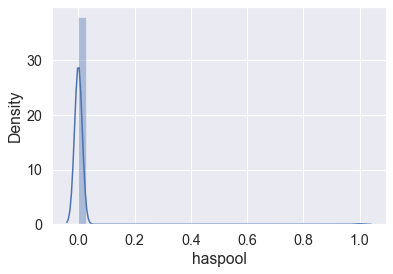

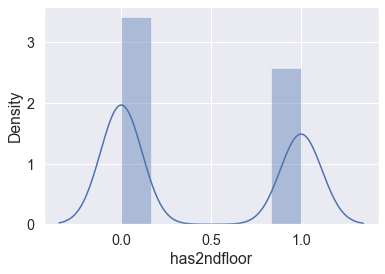

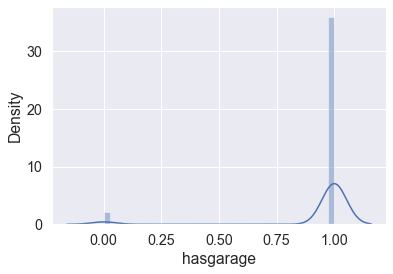

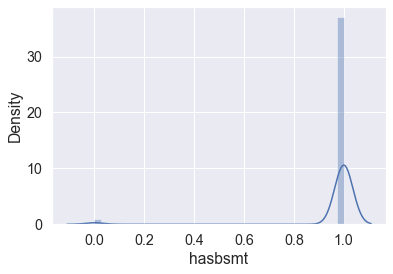

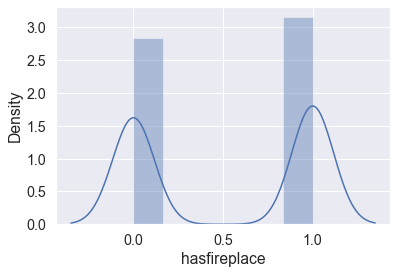

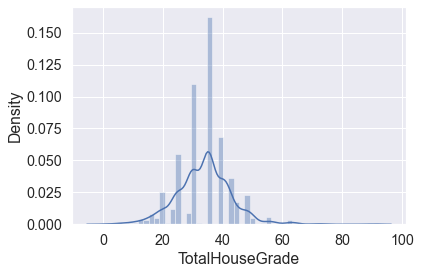

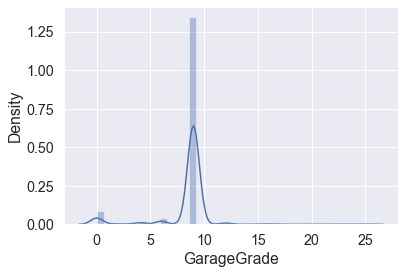

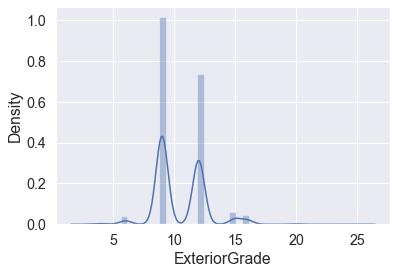

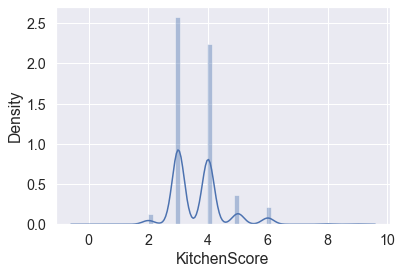

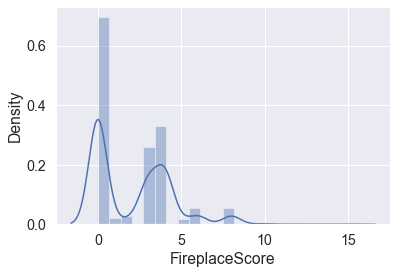

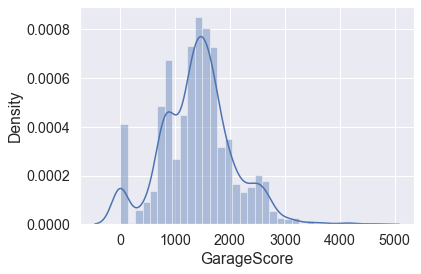

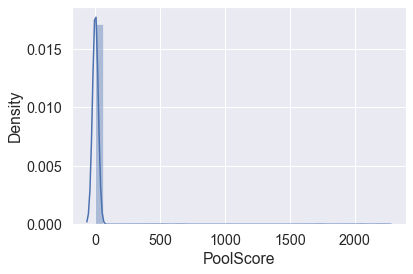

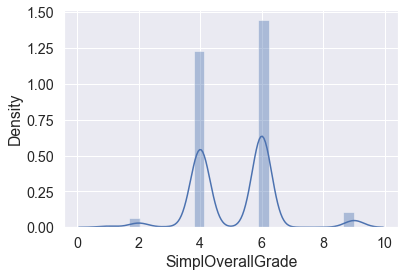

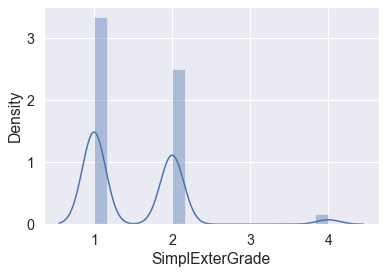

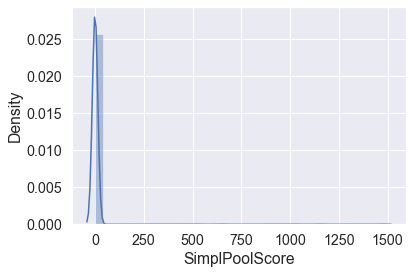

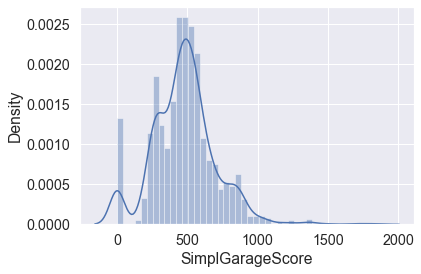

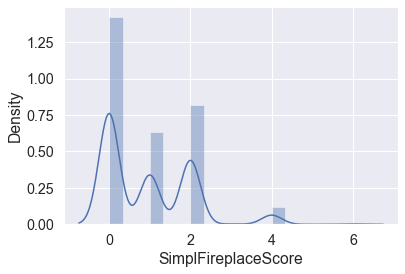

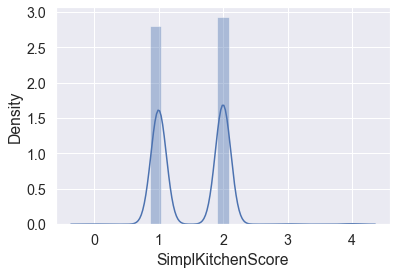

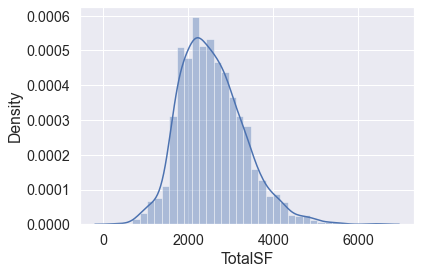

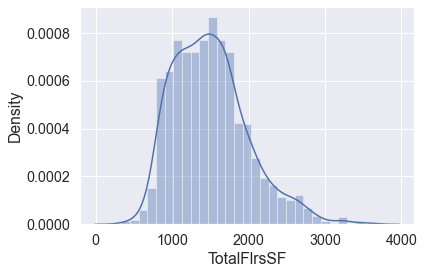

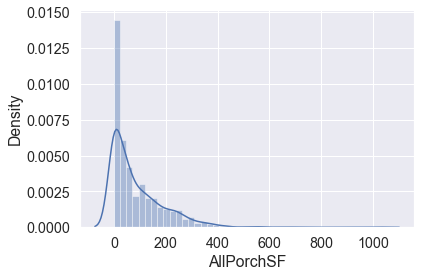

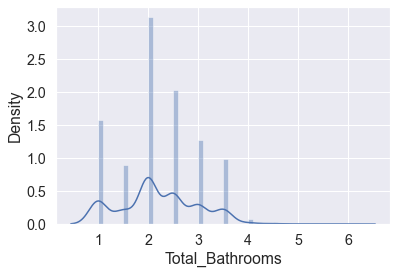

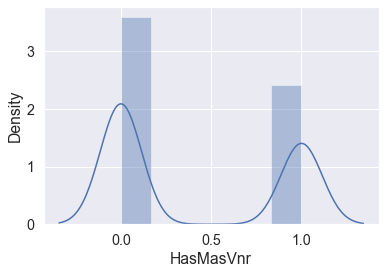

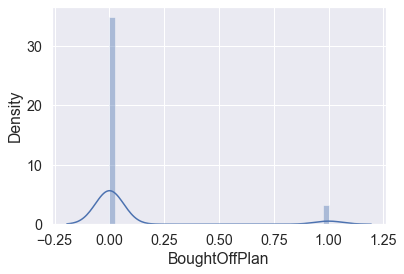

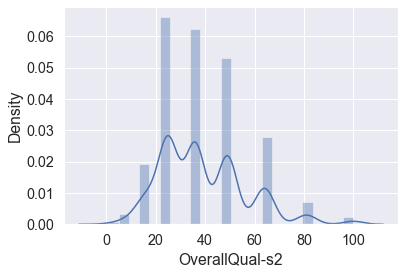

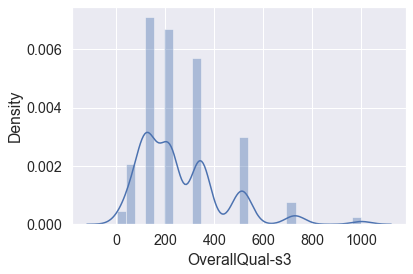

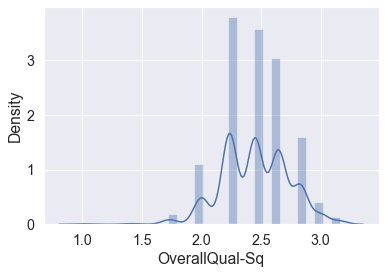

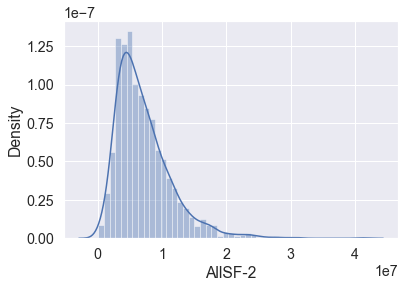

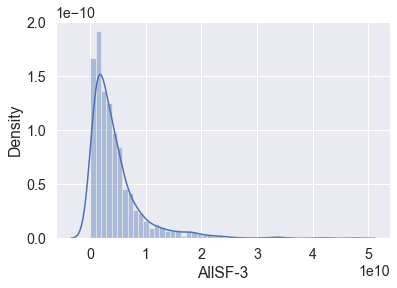

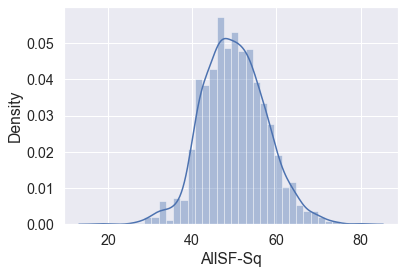

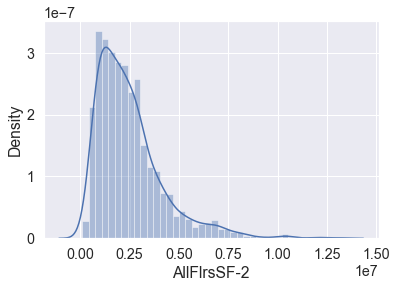

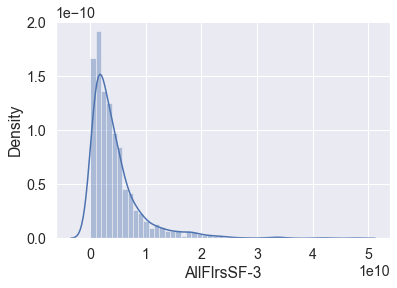

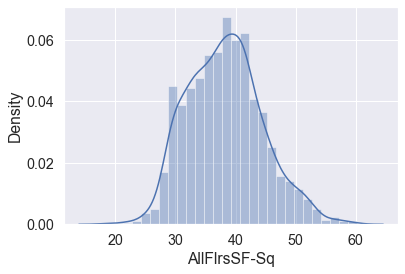

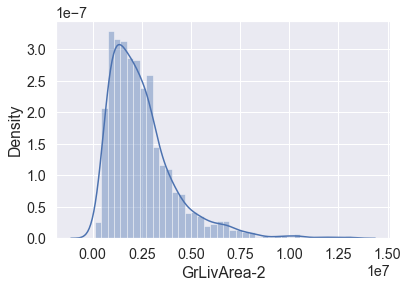

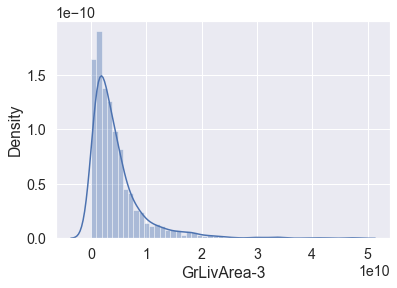

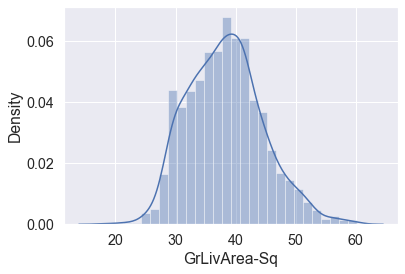

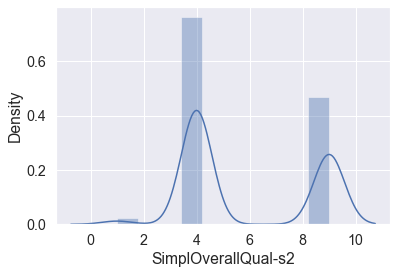

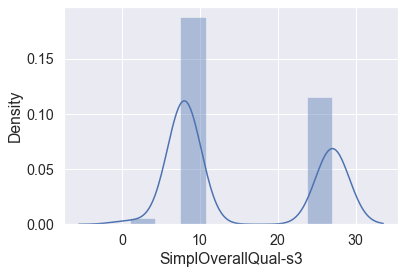

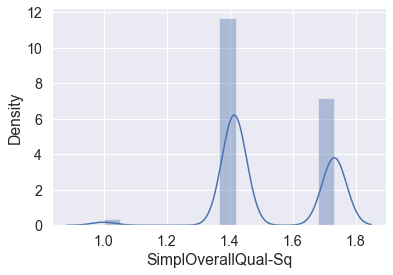

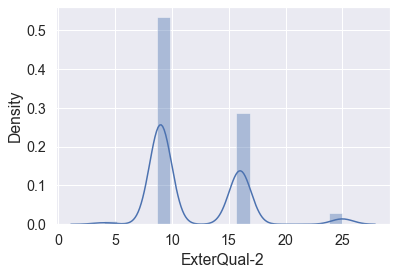

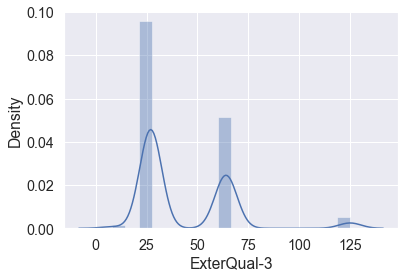

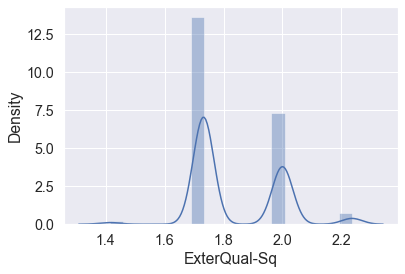

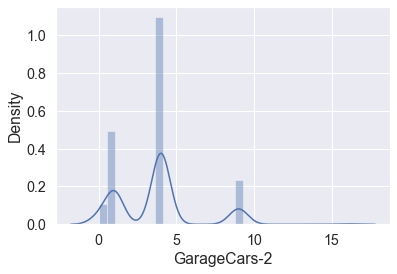

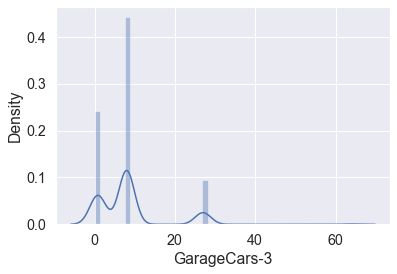

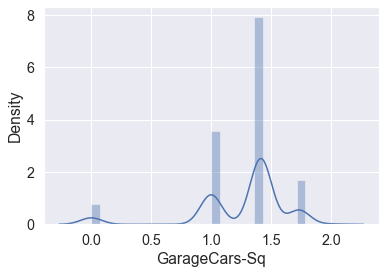

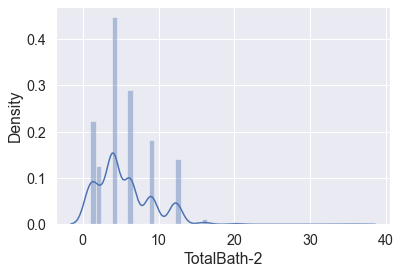

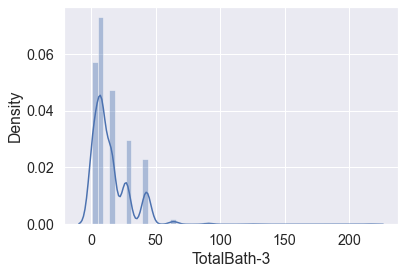

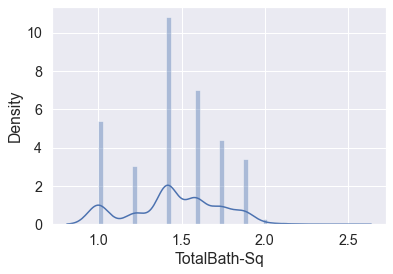

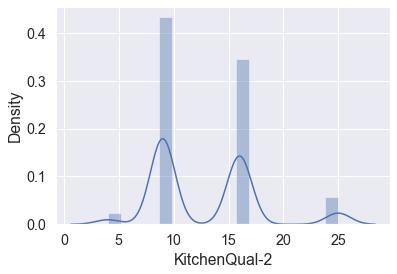

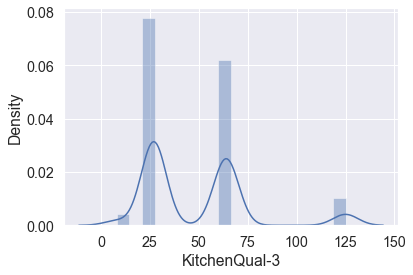

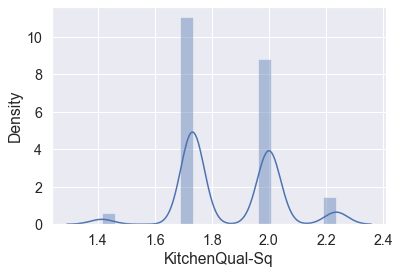

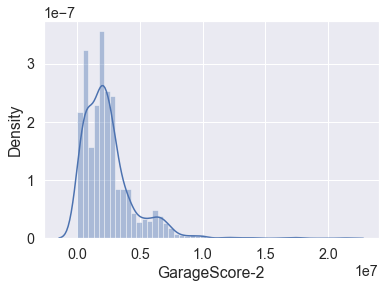

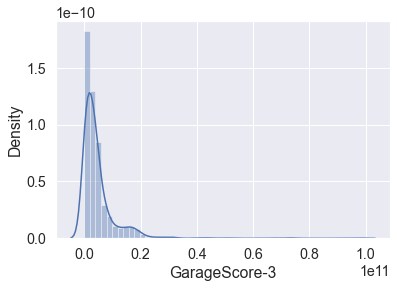

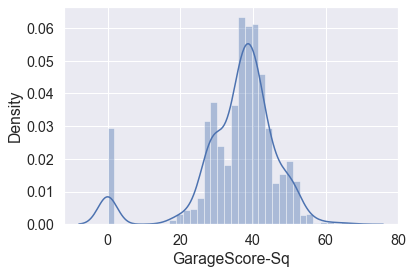

In [265]:
# we can see most of the numerical features are skewed. Regression does not perform well on skewed data.
for i in num_df.columns:
    sns.distplot(num_df[i])
    plt.show()

In [266]:
#Log transform of the skewed numerical features to lessen impact of outliers
#As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = num_df.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index

96 skewed numerical features to log transform


In [267]:
num_df[skewed_features] = np.log1p(num_df[skewed_features]) #applying log(1+x) transformation

In [268]:
# there are Nan values in numeric data due to log transformation, imputing with median
num_df = num_df.fillna(num_df.median())
print("Remaining NAs for numerical features in train : " + str(num_df.isnull().values.sum()))

Remaining NAs for numerical features in train : 0


#### One hot encoding categorical data

In [269]:
cat_df=pd.get_dummies(cat_df)

In [270]:
cat_df.head()

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0                0                0                0                1   
1                0                0                0                1   
2                0                0                0                1   
3                0                0                0                1   
4                0                0                0                1   

   LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 1                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0                 1                     0                     0   
1                 0                     0                     0   
2                 1                     0                     0   
3                 0                     0                     0   
4                 0                     0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     1                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0             

In [271]:
# joining the numerical and categorical data into one
data_new= pd.concat([num_df, cat_df], axis = 1)
print("New number of features : " + str(data_new.shape[1]))

New number of features : 296


In [272]:
data_new.head()

MSSubClass  LotFrontage   LotArea    Street  Alley  LotShape  LandSlope  \
0    1.945910     4.189655  9.042040  1.098612    0.0  1.609438   1.386294   
1    0.693147     4.394449  9.169623  1.098612    0.0  1.609438   1.386294   
2    1.945910     4.234107  9.328212  1.098612    0.0  1.386294   1.386294   
3    2.079442     4.110874  9.164401  1.098612    0.0  1.386294   1.386294   
4    1.945910     4.442651  9.565284  1.098612    0.0  1.386294   1.386294   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0            7     1.791759   7.602900          2003    5.283204   1.609438   
1            6     2.197225   7.589336          1976    0.000000   1.386294   
2            7     1.791759   7.601902          2002    5.093750   1.609438   
3            7     1.791759   7.557995          1970    0.000000   1.386294   
4            8     1.791759   7.601402          2000    5.860786   1.609438   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0   1.386294  1.609438  1.386294      0.000000             6    6.561031   
1   1.386294  1.609438  1.386294      1.386294             5    6.886532   
2   1.386294  1.609438  1.386294      0.693147             6    6.188264   
3   1.386294  1.386294  1.609438      0.000000             5    5.379897   
4   1.386294  1.609438  1.386294      1.098612             6    6.486161   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  \
0      0.693147         0.0   5.017280          856   1.791759  6.753438   
1      0.693147         0.0   5.652489         1262   1.791759  7.141245   
2      0.693147         0.0   6.075346          920   1.791759  6.825460   
3      0.693147         0.0   6.293419          756   1.609438  6.869014   
4      0.693147         0.0   6.196444         1145   1.791759  7.044033   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0  6.751101           0.0   7.444833      0.693147      0.000000         2   
1  0.000000           0.0   7.141245      0.000000      0.693147         2   
2  6.765039           0.0   7.488294      0.693147      0.000000         2   
3  6.629363           0.0   7.448916      0.693147      0.000000         1   
4  6.960348           0.0   7.695758      0.693147      0.000000         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.693147             3      0.693147            4      2.197225   
1  0.000000             3      0.693147            3      1.945910   
2  0.693147             3      0.693147            4      1.945910   
3  0.000000             3      0.693147            4      2.079442   
4  0.693147             4      0.693147            4      2.302585   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
0    2.197225    0.000000            0     7.602900             2           2   
1    2.197225    0.693147            3     7.589336             2           2   
2    2.197225    0.693147            3     7.601902             2           2   
3    2.197225    0.693147            4     7.600402             1           3   
4    2.197225    0.693147            3     7.601402             2           3   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548    1.386294    1.386294    1.098612    0.000000     4.127134   
1         460    1.386294    1.386294    1.098612    5.700444     0.000000   
2         608    1.386294    1.386294    1.098612    0.000000     3.761200   
3         642    1.386294    1.386294    1.098612    0.000000     3.583519   
4         836    1.386294    1.386294    1.098612    5.262690     4.442651   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  \
0       0.000000        0.0          0.0       0.0     0.0    0.0      0.0   
1       0.000000        0.0          0.0       0.0     0.0    0.0      0.0   
2       0.000000        0.0          0.0       0.0     0.0    0.0

### Modelling

In [273]:
data_new.to_csv('feature_eng_done.csv',index=False)

In [274]:
# doing train test split
X_train,X_test,y_train,y_test=train_test_split(data_new,y,test_size=0.3,random_state=100)

In [275]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1019, 296)
(437, 296)
(1019,)
(437,)


In [276]:
from sklearn.model_selection import KFold,cross_val_score,RepeatedKFold
from sklearn.linear_model import Lasso, LinearRegression
kf=KFold(n_splits=5,shuffle=True,random_state=42)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#### We will use pipeline to check our model

In [311]:
# alphas=np.arange(10,15,0.5)
alphas=[0,0.001,0.1,1,10,100,1000]
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=100)
ridgepipe=make_pipeline(RobustScaler(),RidgeCV(alphas=alphas,cv=cv,scoring='r2'))

In [312]:
ridgepipe.fit(X_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.e+00, 1.e-03, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=100),
                         scoring='r2'))])

In [313]:
ridgepipe.named_steps['ridgecv'].alpha_

10.0

In [314]:
ridgepipe.named_steps['ridgecv'].best_score_

0.9137796528042031

Ridge picked 291 features and eliminated the other 5 features


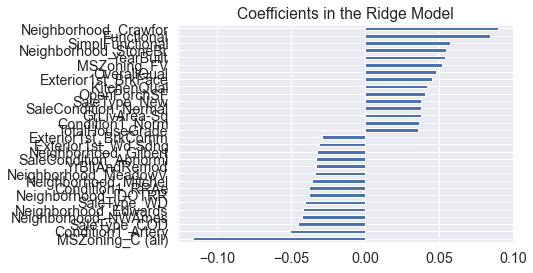

<Figure size 720x720 with 0 Axes>

In [315]:

# Plot important coefficients
coefs = pd.Series(ridgepipe.named_steps['ridgecv'].coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(15),
                     coefs.sort_values().tail(15)])
imp_coefs.plot(kind = "barh");
plt.title("Coefficients in the Ridge Model")
plt.figure(figsize=(10,10))
plt.show()

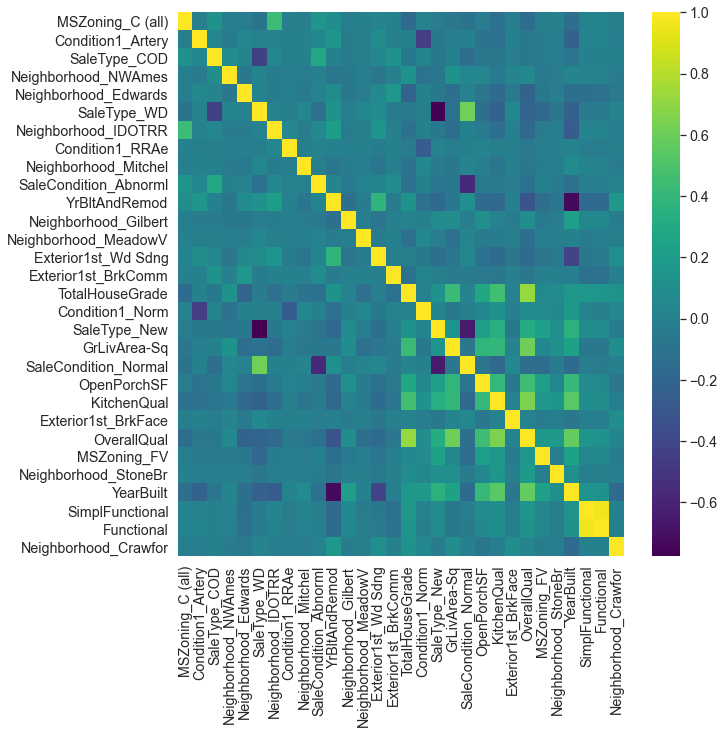

In [282]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train[imp_coefs.index.values].corr(),cmap='viridis');

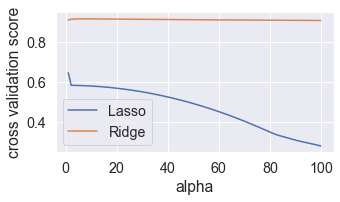

In [283]:
alphas = np.arange(1,100,0.1)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X_train, y_train,n_jobs=-1, cv=3).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()



In [371]:
# alphas=[0,0.001,0.1,1,10,100,1000]
alphas=np.linspace(0,0.02,200)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=50)
lassopipe=make_pipeline(RobustScaler(),LassoCV(alphas=alphas,cv=cv))

In [372]:
lassopipe.fit(X_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.        , 0.0001005 , 0.00020101, 0.00030151, 0.00040201,
       0.00050251, 0.00060302, 0.00070352, 0.00080402, 0.00090452,
       0.00100503, 0.00110553, 0.00120603, 0.00130653, 0.00140704,
       0.00150754, 0.00160804, 0.00170854, 0.00180905, 0.00190955,
       0.00201005, 0.00211055, 0.00221106, 0.00231156, 0.00241206,
       0.0...
       0.01708543, 0.01718593, 0.01728643, 0.01738693, 0.01748744,
       0.01758794, 0.01768844, 0.01778894, 0.01788945, 0.01798995,
       0.01809045, 0.01819095, 0.01829146, 0.01839196, 0.01849246,
       0.01859296, 0.01869347, 0.01879397, 0.01889447, 0.01899497,
       0.01909548, 0.01919598, 0.01929648, 0.01939698, 0.01949749,
       0.01959799, 0.01969849, 0.01979899, 0.0198995 , 0.02      ]),
                         cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=50)))])

In [373]:
lassopipe.named_steps['lassocv'].alpha_

0.0005025125628140704

In [374]:
removed_feats = X_train.columns[(lassopipe.named_steps['lassocv'].coef_ == 0).ravel().tolist()]

In [375]:
X_train.shape

(1019, 296)

In [376]:
removed_feats

Index(['MSSubClass', 'Street', 'LotShape', 'LandSlope', 'YearRemodAdd',
       'ExterCond', 'BsmtFinType2', '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_Oth', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=203)

In [377]:
removed_feats.shape  # removed 220 columns alltogether

(203,)

In [378]:
y_pred=lassopipe.predict(X_test)
r2_score(y_test,y_pred)

0.9306167870948115

In [379]:
coefs = pd.Series(lassopipe.named_steps['lassocv'].coef_, index = X_train.columns)

Ridge picked 93 features and eliminated the other 203 features


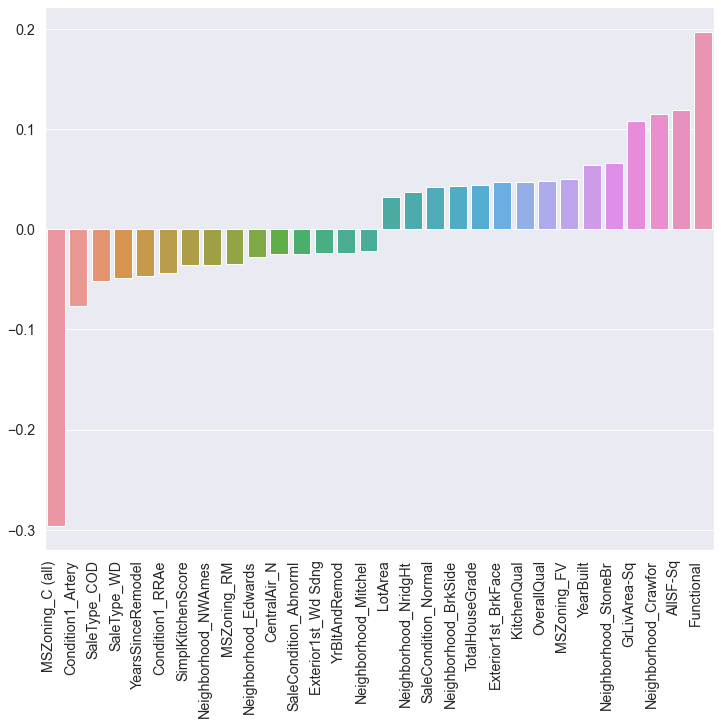

In [380]:
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(15),
                     coefs.sort_values().tail(15)])
# imp_coefs.plot(kind = "barh");
# plt.title("Coefficients in the Ridge Model")
# plt.yticks(rotation=0)

# plt.figure(figsize=(25,20))
# plt.show()
plt.figure(figsize=(12,10))

bar=sns.barplot(imp_coefs.index,imp_coefs.values)
bar.set_xticklabels(bar.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
plt.show()

#### we can see lasso regression outperforms ridge regression by removing unwanted features

#### we will predict using the ridge model

In [290]:
y_pred=ridgepipe.predict(X_test)

In [291]:
y_train_pred=ridgepipe.predict(X_train)

In [292]:
r2_score(y_test,y_pred)

0.9279400890295927

In [293]:
mean_squared_error(y_test,y_pred)

0.011086152093243687

In [306]:
X_test.head(5)

MSSubClass  LotFrontage   LotArea    Street  Alley  LotShape  LandSlope  \
1423    2.302585     4.182050  9.887917  1.098612    0.0  1.386294   1.386294   
432     2.639057     3.218876  7.560601  1.098612    0.0  1.609438   1.386294   
1029    2.639057     3.091042  7.427144  1.098612    0.0  1.609438   1.386294   
585     0.693147     4.488636  9.345221  1.098612    0.0  1.609438   1.386294   
1346    0.693147     4.394449  9.941843  1.098612    0.0  1.098612   1.386294   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
1423            6     2.079442   7.584265          1966    0.000000   
432             5     1.791759   7.586804          1971    5.932245   
1029            6     2.079442   7.587311          1972    5.641907   
585             8     1.791759   7.603898          2006    5.342334   
1346            7     2.079442   7.585281          2003    0.000000   

      ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
1423   1.609438   1.609438  1.609438  1.386294      1.098612             1   
432    1.386294   1.386294  1.386294  1.386294      0.000000             5   
1029   1.386294   1.386294  1.386294  1.386294      0.000000             4   
585    1.609438   1.386294  1.791759  1.386294      1.386294             6   
1346   1.386294   1.386294  1.386294  1.386294      0.000000             4   

      BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
1423    0.000000      0.693147    0.000000   6.548219          697   1.386294   
432     6.156979      0.693147    0.000000   5.686975          765   1.791759   
1029    5.762051      0.693147    0.000000   5.874931          672   1.609438   
585     7.286876      0.693147    0.000000   6.013715         1868   1.791759   
1346    5.697093      1.386294    4.234107   7.093405         1568   1.386294   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1423  7.362645  6.440947           0.0   7.697121      0.000000      0.000000   
432   6.641182  6.398595           0.0   7.219642      0.693147      0.000000   
1029  6.511745  6.304449           0.0   7.105786      0.000000      0.693147   
585   7.615298  0.000000           0.0   7.615298      0.693147      0.000000   
1346  7.676474  0.000000           0.0   7.676474      0.000000      0.000000   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
1423         2  0.000000             4      0.693147            4   
432          1  0.693147             2      0.693147            3   
1029         1  0.693147             3      0.693147            3   
585          2  0.000000             2      0.693147            4   
1346         2  0.000000             3      0.693147            3   

      TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageYrBlt  \
1423      2.197225    2.197225    0.693147            4     7.584265   
432       1.945910    2.079442    0.000000            0     7.586804   
1029      2.079442    2.197225    0.000000            0     7.587311   
585       2.079442    2.197225    1.098612            4     7.603898   
1346      2.302585    2.197225    0.693147            4     7.585281   

      GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
1423             1           2         432    1.609438    1.609438   
432              1           2         440    1.386294    1.386294   
1029             1           1         264    1.386294    1.386294   
585              2           3         880    1.386294    1.386294   
1346             2           2         508    1.609438    1.386294   

      PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1423    1.098612    6.375025     5.468060            0.0   0.000000   
432     1.098612    5.484797     3.610918            0.0   0.000000   
1029    1.098612    0.000000     3.367296            0.0   0.000000   
585     1.098612    5.789960     4.204693            0.0   0.000000   
1346    1.098612    0.000

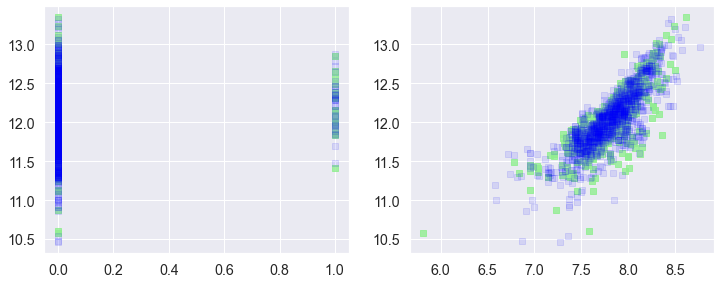

In [310]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.scatter(X_test['Neighborhood_Crawfor'], y_test, c = "lightgreen", marker = "s", label = "Validation data",alpha=0.8);
plt.scatter(X_train['Neighborhood_Crawfor'], y_train, c = "blue", marker = "s", label = "Validation data",alpha=0.1);
plt.subplot(2,2,2)
plt.scatter(X_test['TotalSF'], y_test, c = "lightgreen", marker = "s", label = "Validation data",alpha=0.8);
plt.scatter(X_train['TotalSF'], y_train, c = "blue", marker = "s", label = "Validation data",alpha=0.1);

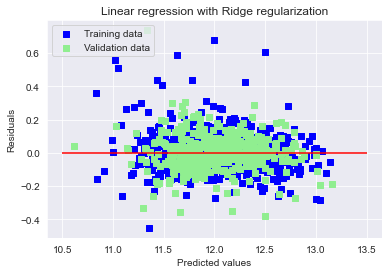

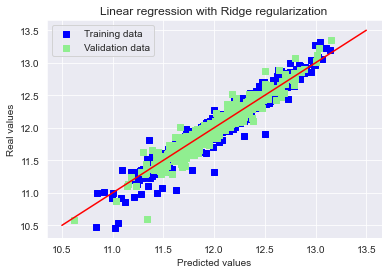

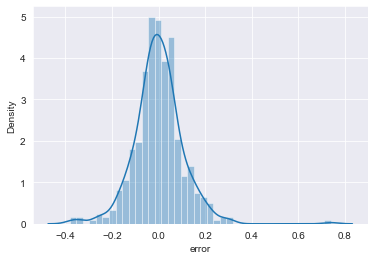

In [87]:
# Plot residuals


plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

sns.distplot((y_pred - y_test),axlabel='error');

#### We can see the error terms are homoscedastic and unbiased. it also follows a normal distribution. Error terms are independent of each other

#### using random forest regressor

In [83]:
pipe_rf=make_pipeline(RobustScaler(),RandomForestRegressor(random_state=42,oob_score=True))
RandomForestRegressor()

RandomForestRegressor()

In [84]:
pipe_rf

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(oob_score=True, random_state=42))])

In [88]:
params=[{'randomforestregressor__criterion':['mse'],
         'randomforestregressor__n_estimators':[1000,1500,2000],
         'randomforestregressor__min_samples_leaf': [2,10],
         'randomforestregressor__max_depth':[10,15,20],
         'randomforestregressor__min_samples_split': [2,10],
         
        }]

In [89]:
grid=GridSearchCV(estimator=pipe_rf,param_grid=params,scoring='r2',cv=3,verbose=5)


In [90]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=1000; total time=  11.1s
[CV 2/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=1000; total time=  11.0s
[CV 3/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=1000; total time=  10.9s
[CV 1/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=1500; total time=  

[CV 3/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=10, randomforestregressor__min_samples_leaf=10, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=2000; total time=  15.0s
[CV 1/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=15, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=1000; total time=  11.7s
[CV 2/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=15, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=1000; total time=  11.8s
[CV 3/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=15, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=1000; total time=  11.8s
[CV 1/3] END randomforestregressor__criterion=mse, ran

[CV 2/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=15, randomforestregressor__min_samples_leaf=10, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=2000; total time=  14.9s
[CV 3/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=15, randomforestregressor__min_samples_leaf=10, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=2000; total time=  15.0s
[CV 1/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=1000; total time=  11.7s
[CV 2/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=2, randomforestregressor__min_samples_split=2, randomforestregressor__n_estimators=1000; total time=  11.9s
[CV 3/3] END randomforestregressor__criterion=mse, r

[CV 1/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=10, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=2000; total time=  14.8s
[CV 2/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=10, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=2000; total time=  14.8s
[CV 3/3] END randomforestregressor__criterion=mse, randomforestregressor__max_depth=20, randomforestregressor__min_samples_leaf=10, randomforestregressor__min_samples_split=10, randomforestregressor__n_estimators=2000; total time=  14.9s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(oob_score=True,
                                                              random_state=42))]),
             param_grid=[{'randomforestregressor__criterion': ['mse'],
                          'randomforestregressor__max_depth': [10, 15, 20],
                          'randomforestregressor__min_samples_leaf': [2, 10],
                          'randomforestregressor__min_samples_split': [2, 10],
                          'randomforestregressor__n_estimators': [1000, 1500,
                                                                  2000]}],
             scoring='r2', verbose=5)

In [91]:
grid.best_params_

{'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': 15,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 2000}

In [108]:
y_test_pred=grid.predict(X_test)

In [109]:
r2_score(y_test,y_test_pred)

0.883367133737837